# PRCP-1006 Home Loan Default Risk

### Problem statement:

#### Task1: Prepare a complete data analysis report on the given data.

#### Task 2:-Create a predictive model  to  identify the factors / customer segments that are eligible for taking loan.

In [10]:
# lets import all the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# import and ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
# set options in this notebook
pd.set_option('display.max_columns', 200)

In [13]:
# lets read the data
data=pd.read_csv("application_train.csv")

In [14]:
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [15]:
data.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

# EDA

In [16]:
data.shape

(307511, 122)

In [17]:
# lets check the Numerical feature's 5 point distribution
data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [18]:
# lets check the objective type features unique values count and its distribution
data.describe(include='object')

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

#### Univariate Analysis:

In [19]:
# lets create two lists, one with all numerical features and one with objective type features
Numerical_col=list(data.describe().columns)
cat_features=list(data.describe(include='object').columns)

In [20]:
print("Numerical_featues_len:",len(Numerical_col))
print("Categorical_featues_len:",len(cat_features))

Numerical_featues_len: 106
Categorical_featues_len: 16


<AxesSubplot:>

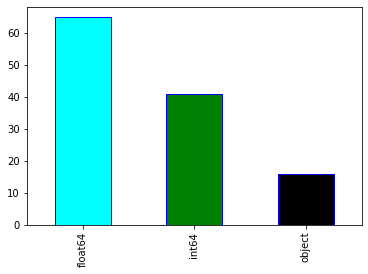

In [21]:
# lets check the data types and it's count

data.dtypes.value_counts().plot(kind='bar', color=['cyan','green','black'],edgecolor='blue')

In [152]:
# lets do univariate analysis using sweetviz
import sweetviz as sw
report=sw.analyze(data)
report.show_html()

                                             |                                                                …

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Insights/Observations from Univariate_analysis

* TARGET: Unequal distribution
* NAME_CONTRACT_TYPE: Cash loan(90%) are more than revolving loans
* CODE_GENDER: 66 out of 100 loan barrowers are females only
* CNT_CHILDREN: people with no kids opting for home loans
* NAME_INCOME_TYPE: 52% working professional has taken for home loan
* NAME_EDUCTION_TYPE: 95% loan barrowers are higher or secondary educated
* NAME_FAMILY_STATUS: People with family are most likely taking home loans
* FLAG_MOBILE: it is 1 in all the applications
* OCCUPATION_TYPE: labrors are leading with 26%

* AMT_CREDIT: this data is positively skewed
* AMT_ANNUITY:  almost all the points lies in betweeen 0 to 100000 except few outliers
* FLAG_MOBIL: in all the cases it is 1 only
* EXT_SOURCE_1: data is normally distributed
* EXT_SOURCE_2: data is negetively skewed with tailedness

* FLAG_OWN_CAR: in 65% samples it is No
* FLAG_OWN_REALITY: in around 70% samples it is YES
* NAME_HOUSING_TYPE: in 90% cases it is House/Apartment
* HOUSETYPE_MODE: it is block of flats in 50% cases
* EMERGENCYSTATE_MODE: it is No in 50% cases

#### Bi-Variate Analysis:

Text(0.5, 0, 'Loan_amount')

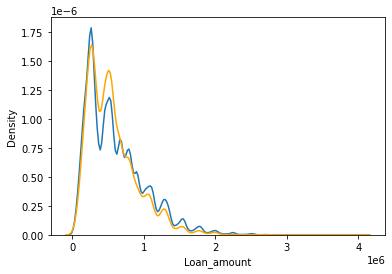

In [13]:
# lets check the Count_of_children data distribution with respect to TARGET
sns.kdeplot(data.loc[data['TARGET']==0,'AMT_CREDIT'])
sns.kdeplot(data.loc[data['TARGET']==1,'AMT_CREDIT'], color='orange')
plt.xlabel("Loan_amount")


* People have taken Large amount of loans are likely repaying bak compared to people with less loan amount

Text(0.5, 0, 'Age_of_Customers')

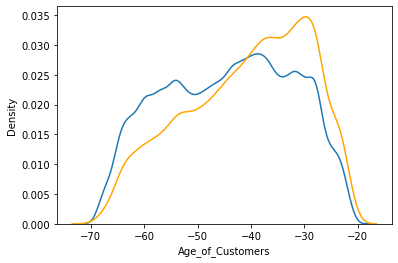

In [14]:
# lets check the days_birth data distribution with respect to TARGET
sns.kdeplot(data.loc[data['TARGET']==0,'DAYS_BIRTH']/365)
sns.kdeplot(data.loc[data['TARGET']==1,'DAYS_BIRTH']/365, color='orange')
plt.xlabel("Age_of_Customers")

* we can observe that young age customers are not repaying the loans

Text(0.5, 0, 'Education_of_Customers')

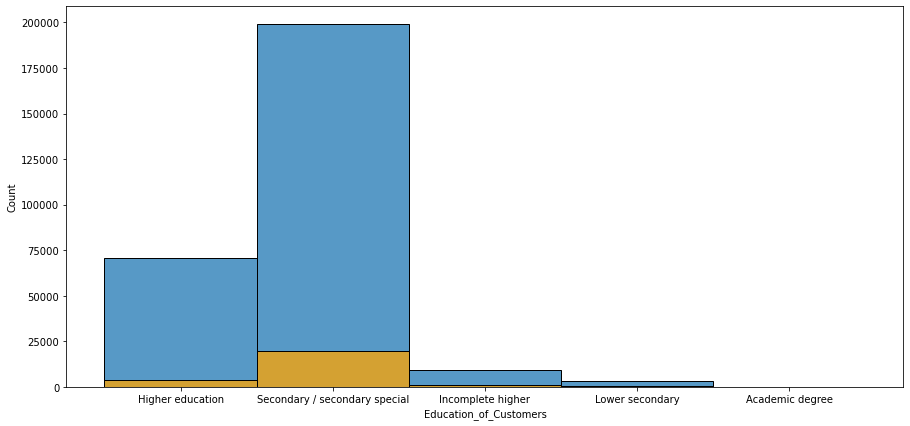

In [17]:
# lets check the Education data distribution with respect to TARGET
plt.figure(figsize=(15,7))
sns.histplot(data.loc[data['TARGET']==0,'NAME_EDUCATION_TYPE'])
sns.histplot(data.loc[data['TARGET']==1,'NAME_EDUCATION_TYPE'], color='orange')
plt.xlabel("Education_of_Customers")

Text(0.5, 0, 'Family')

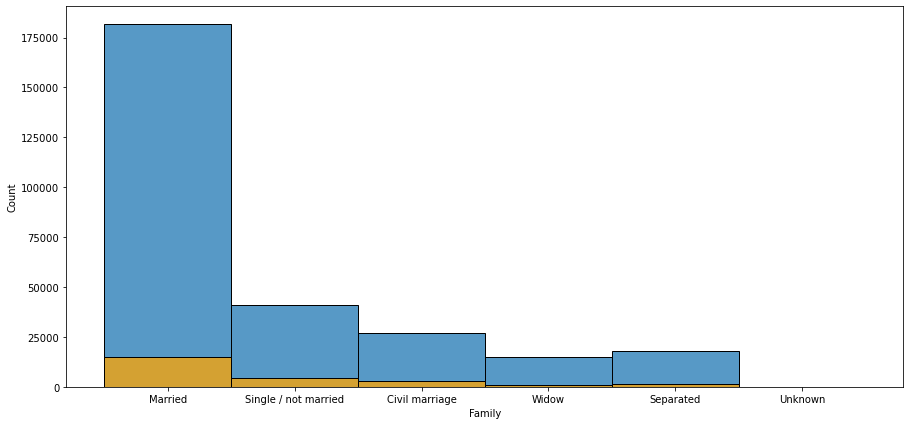

In [18]:
# lets check the family_type data distribution with respect to TARGET
plt.figure(figsize=(15,7))
sns.histplot(data.loc[data['TARGET']==0,'NAME_FAMILY_STATUS'])
sns.histplot(data.loc[data['TARGET']==1,'NAME_FAMILY_STATUS'], color='orange')
plt.xlabel("Family")

* Widows have very less cases when they have not repayed

Text(0.5, 0, 'OCCUPATION')

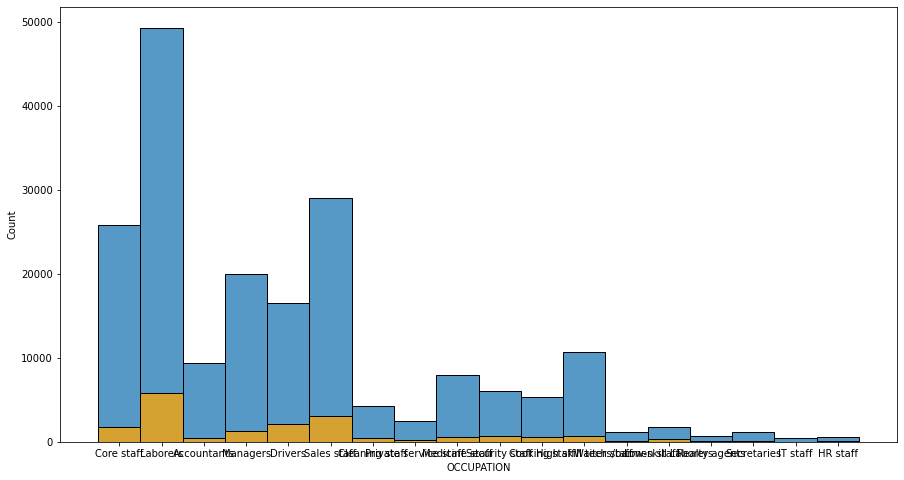

In [19]:
# lets check the Occupation_type data distribution with respect to TARGET
plt.figure(figsize=(15,8))
sns.histplot(data.loc[data['TARGET']==0,'OCCUPATION_TYPE'])
sns.histplot(data.loc[data['TARGET']==1,'OCCUPATION_TYPE'], color='orange')
plt.xlabel("OCCUPATION")

* Accountants are mostly likely repaying the loans

Text(0.5, 0, 'DAYS_EMPLOYED')

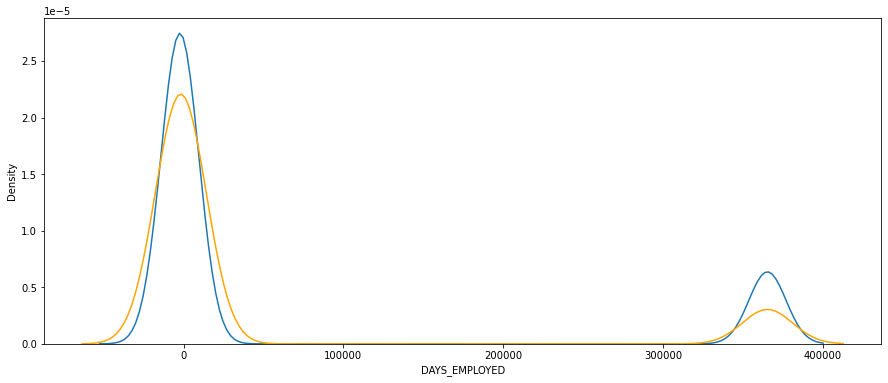

In [20]:
# lets check the Day_employed data distribution with respect to TARGET
plt.figure(figsize=(15,6))
sns.kdeplot(data.loc[data['TARGET']==0,'DAYS_EMPLOYED'])
sns.kdeplot(data.loc[data['TARGET']==1,'DAYS_EMPLOYED'], color='orange')
plt.xlabel("DAYS_EMPLOYED")

* DAYS_EMPLOYED: there is an error data(365243 days can't be possible)

Text(0.5, 0, 'GENDER')

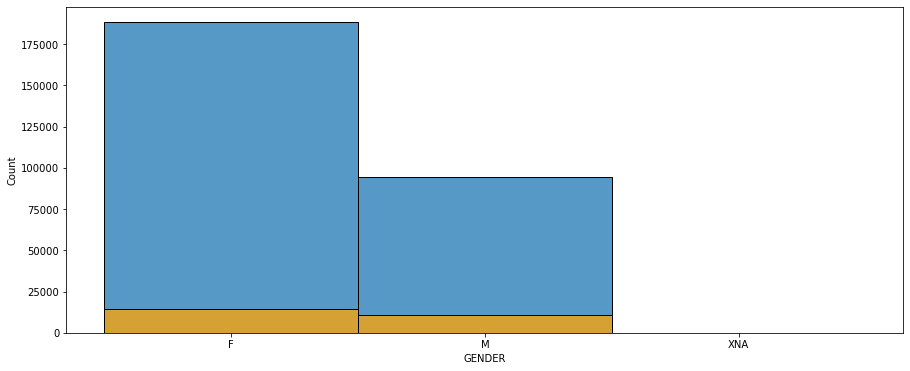

In [21]:
# lets check the Gender data distribution with respect to TARGET
plt.figure(figsize=(15,6))
sns.histplot(data.loc[data['TARGET']==0,'CODE_GENDER'])
sns.histplot(data.loc[data['TARGET']==1,'CODE_GENDER'], color='orange')
plt.xlabel("GENDER")

* Male Customers Not_repaying rate is more than female customers

Text(0.5, 0, 'External source1')

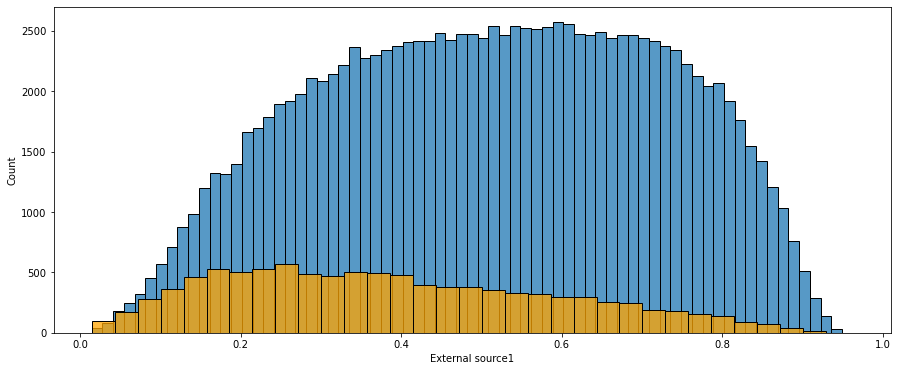

In [22]:
# lets check the External source data distribution with respect to TARGET
plt.figure(figsize=(15,6))
sns.histplot(data.loc[data['TARGET']==0,'EXT_SOURCE_1'])
sns.histplot(data.loc[data['TARGET']==1,'EXT_SOURCE_1'], color='orange')
plt.xlabel("External source1")

* if people have ext_source1 0.8 to 1 they are repaying, and if people dont have between 0 to 0.2 they are not paying

Text(0.5, 0, 'External source2')

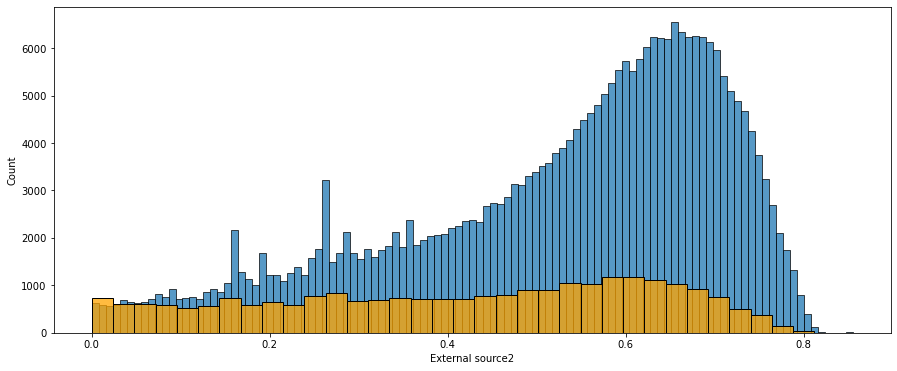

In [23]:
# lets check the External source data distribution with respect to TARGET
plt.figure(figsize=(15,6))
sns.histplot(data.loc[data['TARGET']==0,'EXT_SOURCE_2'])
sns.histplot(data.loc[data['TARGET']==1,'EXT_SOURCE_2'], color='orange')
plt.xlabel("External source2")

* data is negetively skewed and if people dont have external source 0 to 0.6 they are not repaying and if they have 0.8 to 1 they are repaying

Text(0.5, 0, 'External source3')

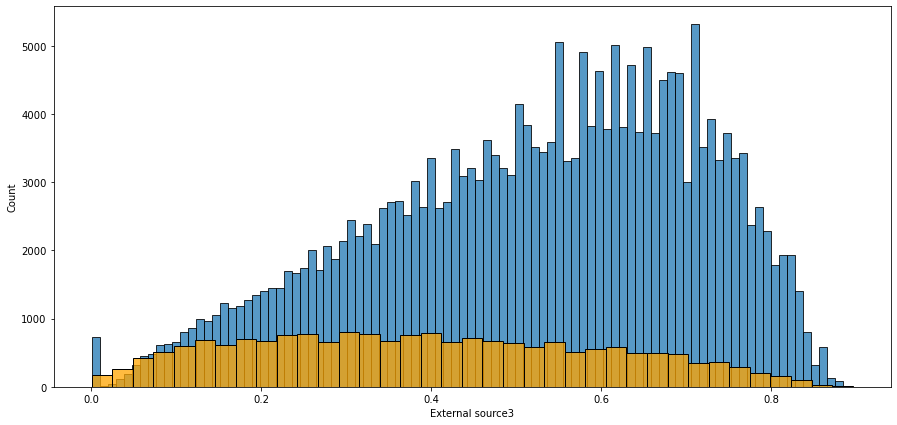

In [24]:
# lets check the External source data distribution with respect to TARGET
plt.figure(figsize=(15,7))
sns.histplot(data.loc[data['TARGET']==0,'EXT_SOURCE_3'])
sns.histplot(data.loc[data['TARGET']==1,'EXT_SOURCE_3'], color='orange')
plt.xlabel("External source3")

* data is negetively skewed and if people dont have external source 0 to 0.6 they are not repaying and if they have 0.8 to 1 they are repaying

Text(0.5, 0, 'APARTMENTS_AVG')

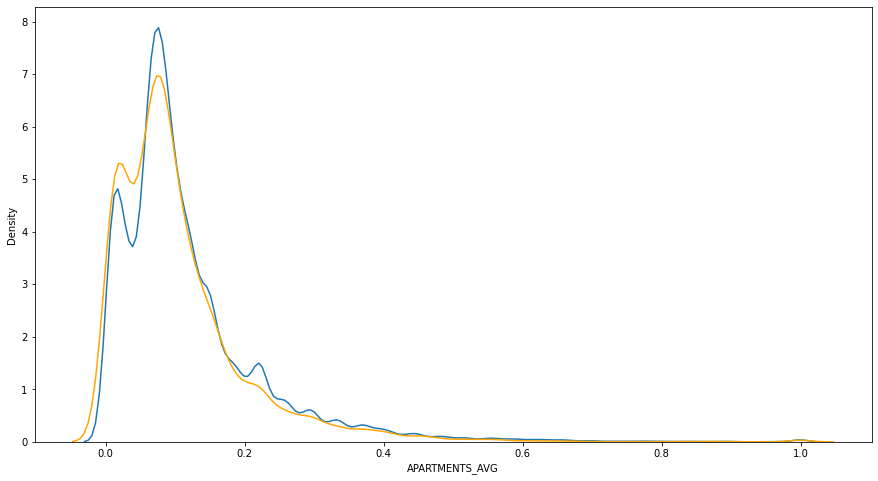

In [25]:
# lets check the APARTMENTS_AVG source data distribution with respect to TARGET
plt.figure(figsize=(15,8))
sns.kdeplot(data.loc[data['TARGET']==0,'APARTMENTS_AVG'])
sns.kdeplot(data.loc[data['TARGET']==1,'APARTMENTS_AVG'], color='orange')
plt.xlabel("APARTMENTS_AVG")

* if APARTMENTS_AVG is more than 0.2 people are repaying 

Text(0.5, 0, 'REGION_RATING_CLIENT')

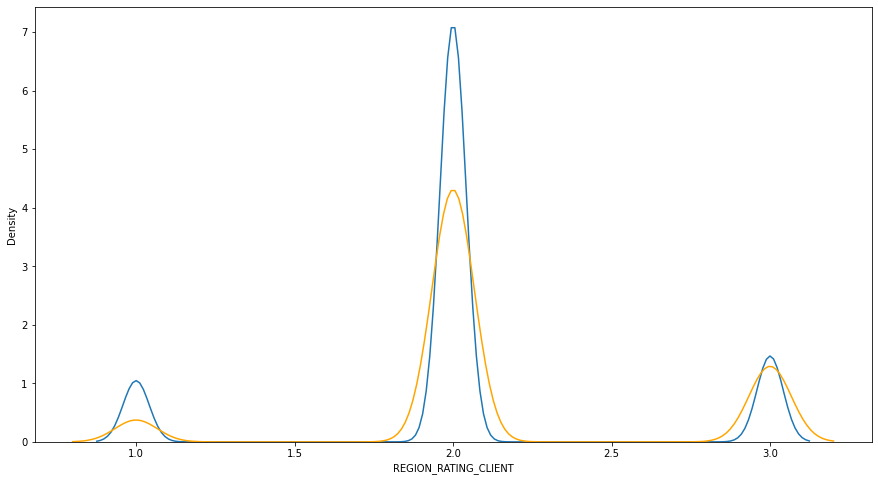

In [26]:
# lets check the REGION_RATING_CLIENT source data distribution with respect to TARGET
plt.figure(figsize=(15,8))
sns.kdeplot(data.loc[data['TARGET']==0,'REGION_RATING_CLIENT'])
sns.kdeplot(data.loc[data['TARGET']==1,'REGION_RATING_CLIENT'], color='orange')
plt.xlabel("REGION_RATING_CLIENT")

* People with region_rating_clernt 1.0 are ore likely repaying and people with 3.0 not repaying

#### Insights/Observations from Bi_variate analysis:

* People with region_rating_clernt 1.0 are ore likely repaying and people with 3.0 not repaying
* AMT_CREDIT:People have taken Large amount of loans are likely repaying bak compared to people with less loan amount
* DAYS_BIRTH:we can observe that young age customers are not repaying the loans
* NAME_FAMILY_STATUS: Widows have very less cases when they have not repayed
* DAYS_EMPLOYED: there is an error data(365243 days can't be possible)
* CODE_GENDER: Male Customers Not_repaying rate is more than female customers
* EXT_SOURCE_1: if people have ext_source1 0.8 to 1 they are repaying, and if people dont have between 0 to 0.2 they are not paying
* EXT_SOURCE_2: data is negetively skewed and if people dont have external source 0 to 0.6 they are not repaying and if they have 0.8 to 1 they are repaying
* EXT_SOURCE_3: data is negetively skewed and if people dont have external source 0 to 0.6 they are not repaying and if they have 0.8 to 1 they are repaying
* APARTMENTS_AVG: if APARTMENTS_AVG is more than 0.2 people are repaying


### MultiVariate Analysis:

In [7]:
mul_var=['CODE_GENDER','AMT_CREDIT','AMT_ANNUITY','FLAG_OWN_CAR','AMT_GOODS_PRICE','NAME_INCOME_TYPE','FLAG_EMP_PHONE',
        'DAYS_BIRTH','FLAG_DOCUMENT_6','FLAG_DOCUMENT_3','FLAG_DOCUMENT_8','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
        'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION']

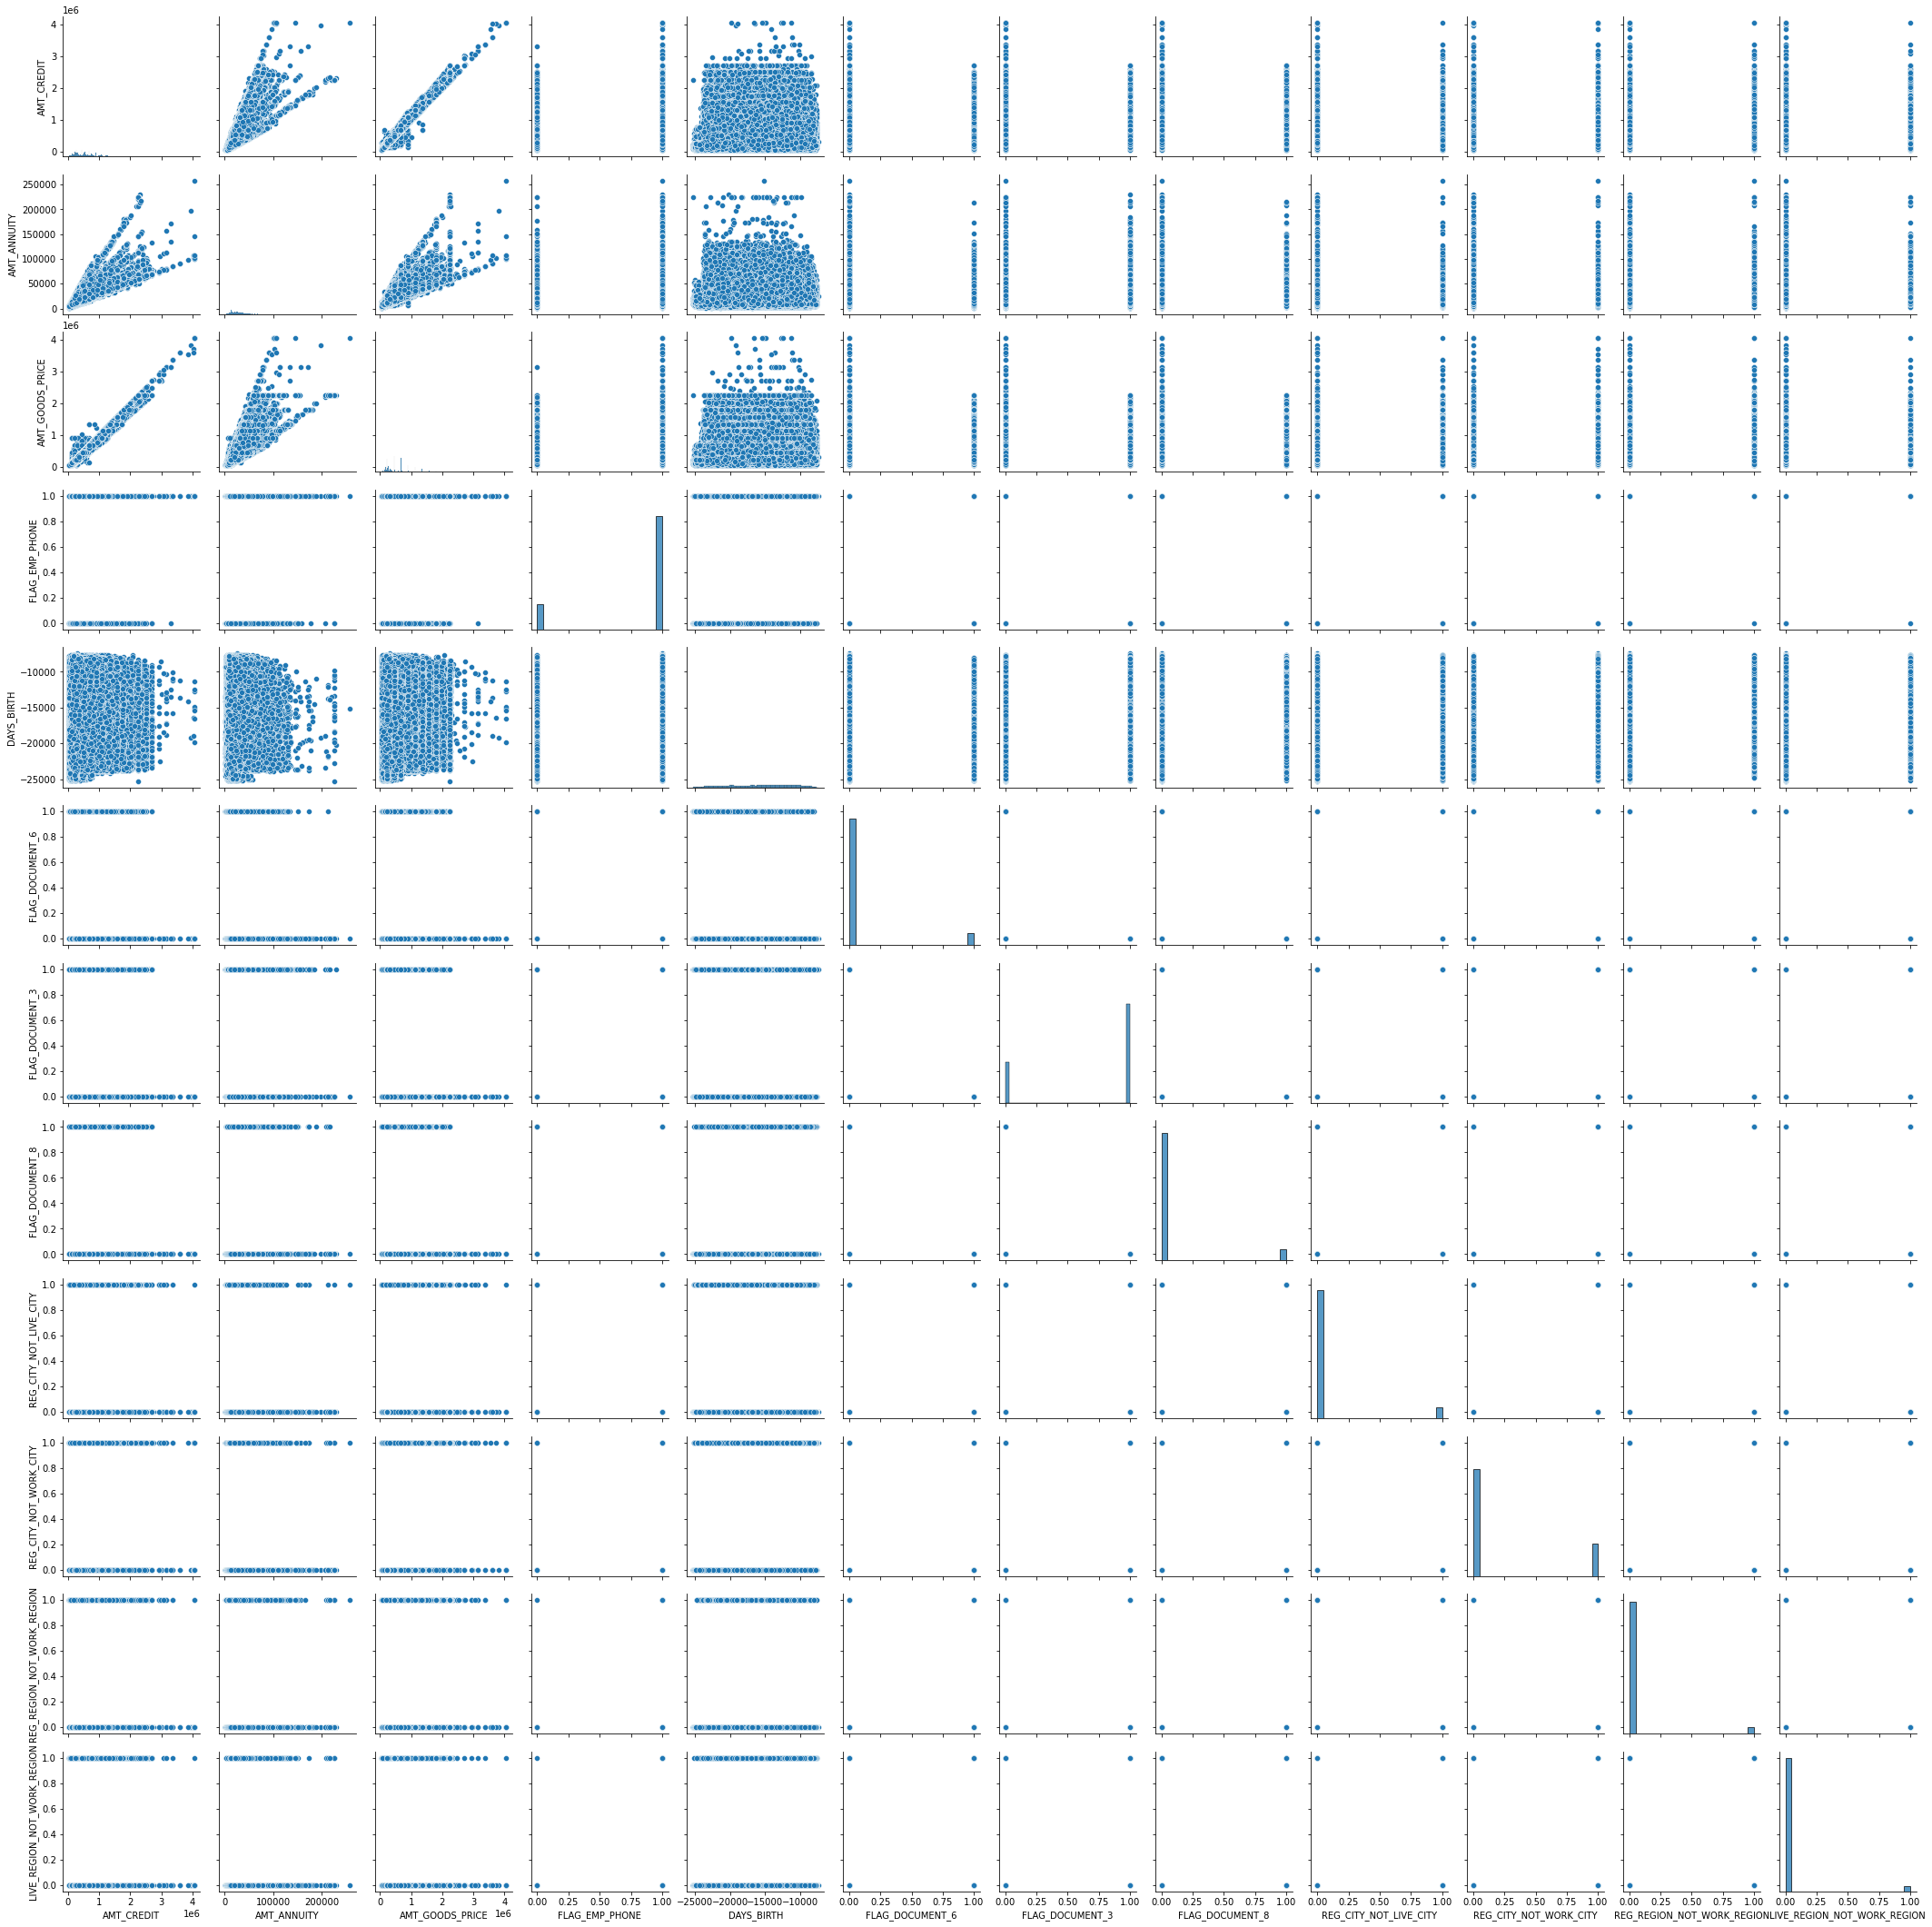

In [9]:
sns.pairplot(data[mul_var])

##### Observations / Insights from Multivariate analysis:

* AMT_CREDIT has high positive relation with  AMT_AMT_GOODS_PRICE and AMT_ANNUITY and viceversa. 

# Data Preprocessing techniques

### Treating missing values 

In [22]:
# lets check the missing values percentage in each feature
(data.isnull().sum()/data.shape[0]*100).to_frame().sort_values(by=0,ascending=False).head(60)

0
COMMONAREA_MEDI               69.872297
COMMONAREA_AVG                69.872297
COMMONAREA_MODE               69.872297
NONLIVINGAPARTMENTS_MODE      69.432963
NONLIVINGAPARTMENTS_AVG       69.432963
NONLIVINGAPARTMENTS_MEDI      69.432963
FONDKAPREMONT_MODE            68.386172
LIVINGAPARTMENTS_MODE         68.354953
LIVINGAPARTMENTS_AVG          68.354953
LIVINGAPARTMENTS_MEDI         68.354953
FLOORSMIN_AVG                 67.848630
FLOORSMIN_MODE                67.848630
FLOORSMIN_MEDI                67.848630
YEARS_BUILD_MEDI              66.497784
YEARS_BUILD_MODE              66.497784
YEARS_BUILD_AVG               66.497784
OWN_CAR_AGE                   65.990810
LANDAREA_MEDI                 59.376738
LANDAREA_MODE                 59.376738
LANDAREA_AVG                  59.376738
BASEMENTAREA_MEDI             58.515956
BASEMENTAREA_AVG              58.515956
BASEMENTAREA_MODE             58.515956
EXT_SOURCE_1                  56.381073
NONLIVINGAREA_MODE            55.179164
NONLIVINGAREA_AVG             55.179164
NONLIVINGAREA_MEDI            55.179164
ELEVATORS_MEDI                53.295980
ELEVATORS_AVG                 53.295980
ELEVATORS_MODE                53.295980
WALLSMATERIAL_MODE            50.840783
APARTMENTS_MEDI               50.749729
APARTMENTS_AVG                50.749729
APARTMENTS_MODE               50.749729
ENTRANCES_MEDI                50.348768
ENTRANCES_AVG                 50.348768
ENTRANCES_MODE                50.348768
LIVINGAREA_AVG                50.193326
LIVINGAREA_MODE               50.193326
LIVINGAREA_MEDI               50.193326
HOUSETYPE_MODE                50.176091
FLOORSMAX_MODE                49.760822
FLOORSMAX_MEDI                49.760822
FLOORSMAX_AVG                 49.760822
YEARS_BEGINEXPLUATATION_MODE  48.781019
YEARS_BEGINEXPLUATATION_MEDI  48.781019
YEARS_BEGINEXPLUATATION_AVG   48.781019
TOTALAREA_MODE                48.268517
EMERGENCYSTATE_MODE           47.398304
OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021

In [23]:
# will drop the features having Missing values more than 50% of the entire data

val_percent=data.shape[0]*0.75

column_to_drop=[c for c in data.columns if data[c].isnull().sum() > val_percent]

# lets drop the features having more than 50% missing values

data=data.drop(column_to_drop, axis=1)

In [24]:
# shape of the data after dropping few features
data.shape

(307511, 122)

##### i will impute Numerical features with it's mean(Continuous) or Median(discrete) and categorical featues with mode

In [25]:
(data.isnull().sum()/data.shape[0]*100).to_frame().sort_values(by=0,ascending=False).head(60)

0
COMMONAREA_MEDI               69.872297
COMMONAREA_AVG                69.872297
COMMONAREA_MODE               69.872297
NONLIVINGAPARTMENTS_MODE      69.432963
NONLIVINGAPARTMENTS_AVG       69.432963
NONLIVINGAPARTMENTS_MEDI      69.432963
FONDKAPREMONT_MODE            68.386172
LIVINGAPARTMENTS_MODE         68.354953
LIVINGAPARTMENTS_AVG          68.354953
LIVINGAPARTMENTS_MEDI         68.354953
FLOORSMIN_AVG                 67.848630
FLOORSMIN_MODE                67.848630
FLOORSMIN_MEDI                67.848630
YEARS_BUILD_MEDI              66.497784
YEARS_BUILD_MODE              66.497784
YEARS_BUILD_AVG               66.497784
OWN_CAR_AGE                   65.990810
LANDAREA_MEDI                 59.376738
LANDAREA_MODE                 59.376738
LANDAREA_AVG                  59.376738
BASEMENTAREA_MEDI             58.515956
BASEMENTAREA_AVG              58.515956
BASEMENTAREA_MODE             58.515956
EXT_SOURCE_1                  56.381073
NONLIVINGAREA_MODE            55.179164
NONLIVINGAREA_AVG             55.179164
NONLIVINGAREA_MEDI            55.179164
ELEVATORS_MEDI                53.295980
ELEVATORS_AVG                 53.295980
ELEVATORS_MODE                53.295980
WALLSMATERIAL_MODE            50.840783
APARTMENTS_MEDI               50.749729
APARTMENTS_AVG                50.749729
APARTMENTS_MODE               50.749729
ENTRANCES_MEDI                50.348768
ENTRANCES_AVG                 50.348768
ENTRANCES_MODE                50.348768
LIVINGAREA_AVG                50.193326
LIVINGAREA_MODE               50.193326
LIVINGAREA_MEDI               50.193326
HOUSETYPE_MODE                50.176091
FLOORSMAX_MODE                49.760822
FLOORSMAX_MEDI                49.760822
FLOORSMAX_AVG                 49.760822
YEARS_BEGINEXPLUATATION_MODE  48.781019
YEARS_BEGINEXPLUATATION_MEDI  48.781019
YEARS_BEGINEXPLUATATION_AVG   48.781019
TOTALAREA_MODE                48.268517
EMERGENCYSTATE_MODE           47.398304
OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021

In [26]:
data['COMMONAREA_MEDI'].unique()

array([0.0144, 0.0608,    nan, ..., 0.1631, 0.124 , 0.1648])

In [27]:
# COMMONAREA_MEDI features missing values imputing
data['COMMONAREA_MEDI'].fillna(data['COMMONAREA_MEDI'].mean(), inplace=True)

In [28]:
data['COMMONAREA_AVG'].unique()

array([0.0143, 0.0605,    nan, ..., 0.2254, 0.3272, 0.162 ])

In [29]:
# COMMONAREA_AVG features missing values imputing
data['COMMONAREA_AVG'].fillna(data['COMMONAREA_AVG'].mean(), inplace=True)

In [30]:
data['COMMONAREA_MODE'].unique()

array([0.0144, 0.0497,    nan, ..., 0.3449, 0.3302, 0.1635])

In [31]:
# COMMONAREA_MODE features missing values imputing
data['COMMONAREA_MODE'].fillna(data['COMMONAREA_MODE'].mean(), inplace=True)

In [32]:
data['NONLIVINGAPARTMENTS_MODE'].unique()

array([0.    ,    nan, 0.0195, 0.0078, 0.0039, 0.0661, 0.1556, 0.0233,
       0.0778, 0.1946, 0.0389, 0.0156, 0.2218, 0.0117, 0.0272, 0.1634,
       0.0311, 0.0428, 0.0623, 0.0506, 0.1284, 0.0584, 0.2646, 0.1984,
       0.0467, 0.1167, 0.0817, 0.0739, 0.751 , 0.1245, 1.    , 0.0934,
       0.144 , 0.0545, 0.2296, 0.07  , 0.0895, 0.035 , 0.1206, 0.2062,
       0.1089, 0.1401, 0.2335, 0.3852, 0.0856, 0.1323, 0.3658, 0.463 ,
       0.323 , 0.1518, 0.3074, 0.4241, 0.1012, 0.2101, 0.8482, 0.1595,
       0.6848, 0.1362, 0.214 , 0.3735, 0.5953, 0.2957, 0.5175, 0.1128,
       0.2607, 0.4008, 0.2763, 0.6226, 0.4708, 0.1051, 0.4397, 0.4163,
       0.2724, 0.0973, 0.6615, 0.5564, 0.1673, 0.2802, 0.2023, 0.3113,
       0.1479, 0.5331, 0.9416, 0.8911, 0.7121, 0.2568, 0.3152, 0.7004,
       0.9805, 0.4825, 0.3891, 0.2412, 0.3035, 0.5136, 0.249 , 0.4125,
       0.9339, 0.3463, 0.3268, 0.2918, 0.3307, 0.2179, 0.3385, 0.4202,
       0.4591, 0.8249, 0.4475, 0.3502, 0.179 , 0.4086, 0.6459, 0.5447,
      

In [33]:
# NONLIVINGAPARTMENTS_MODE features missing values imputing
data['NONLIVINGAPARTMENTS_MODE'].fillna(data['NONLIVINGAPARTMENTS_MODE'].mean(), inplace=True)

In [34]:
# NONLIVINGAPARTMENTS_AVG features missing values imputing
data['NONLIVINGAPARTMENTS_AVG'].fillna(data['NONLIVINGAPARTMENTS_AVG'].mean(), inplace=True)

In [35]:
# NONLIVINGAPARTMENTS_MEDI features missing values imputing
data['NONLIVINGAPARTMENTS_MEDI'].fillna(data['NONLIVINGAPARTMENTS_MEDI'].mean(), inplace=True)

In [36]:
data['FONDKAPREMONT_MODE'].unique()

array(['reg oper account', nan, 'org spec account',
       'reg oper spec account', 'not specified'], dtype=object)

In [37]:
# FONDKAPREMONT_MODE features missing values imputing
data['FONDKAPREMONT_MODE'].fillna(data['FONDKAPREMONT_MODE'].mode()[0], inplace=True)

In [38]:
# LIVINGAPARTMENTS_MODE features missing values imputing
data['LIVINGAPARTMENTS_MODE'].fillna(data['LIVINGAPARTMENTS_MODE'].mean(), inplace=True)

In [39]:
data['LIVINGAPARTMENTS_AVG'].unique()

array([0.0202, 0.0773,    nan, ..., 0.2334, 0.0111, 0.1543])

In [40]:
# LIVINGAPARTMENTS_AVG features missing values imputing
data['LIVINGAPARTMENTS_AVG'].fillna(data['LIVINGAPARTMENTS_AVG'].mean(), inplace=True)

In [41]:
data['LIVINGAPARTMENTS_MEDI'].unique()

array([0.0205, 0.0787,    nan, ..., 0.8063, 0.6088, 0.3638])

In [42]:
# LIVINGAPARTMENTS_MEDI features missing values imputing
data['LIVINGAPARTMENTS_MEDI'].fillna(data['LIVINGAPARTMENTS_MEDI'].mean(), inplace=True)

In [43]:
# FLOORSMIN_AVG features missing values imputing
data['FLOORSMIN_AVG'].fillna(data['FLOORSMIN_AVG'].mean(), inplace=True)

In [44]:
data['FLOORSMIN_MODE'].unique()

array([0.125 , 0.3333,    nan, 0.375 , 0.7083, 0.0417, 0.2083, 0.4167,
       0.2917, 0.    , 0.5   , 0.625 , 0.0833, 0.1667, 0.6667, 0.25  ,
       0.5833, 1.    , 0.9583, 0.5417, 0.9167, 0.75  , 0.8333, 0.4583,
       0.7917, 0.875 ])

In [45]:
# FLOORSMIN_MODE features missing values imputing
data['FLOORSMIN_MODE'].fillna(data['FLOORSMIN_MODE'].mean(), inplace=True)

In [46]:
data['FLOORSMIN_MEDI'].unique()

array([0.125 , 0.3333,    nan, 0.375 , 0.7083, 0.0417, 0.2083, 0.4167,
       0.2917, 0.    , 0.5   , 0.625 , 0.0833, 0.1667, 0.5208, 0.1042,
       0.6667, 0.5417, 0.25  , 0.5833, 0.2292, 0.3125, 0.4375, 0.4792,
       0.2708, 0.0625, 0.1458, 1.    , 0.6458, 0.8333, 0.1875, 0.3542,
       0.9583, 0.0208, 0.4583, 0.9167, 0.6042, 0.75  , 0.3958, 0.7708,
       0.7917, 0.5625, 0.6875, 0.7292, 0.8125, 0.9792, 0.8542, 0.875 ])

In [47]:
# FLOORSMIN_MEDI features missing values imputing
data['FLOORSMIN_MEDI'].fillna(data['FLOORSMIN_MEDI'].mean(), inplace=True)

In [48]:
# YEARS_BUILD_MEDI features missing values imputing
data['YEARS_BUILD_MEDI'].fillna(data['YEARS_BUILD_MEDI'].mean(), inplace=True)

In [49]:
# YEARS_BUILD_MODE features missing values imputing
data['YEARS_BUILD_MODE'].fillna(data['YEARS_BUILD_MODE'].mean(), inplace=True)

In [50]:
# YEARS_BUILD_AVG features missing values imputing
data['YEARS_BUILD_AVG'].fillna(data['YEARS_BUILD_AVG'].mean(), inplace=True)

In [51]:
data['OWN_CAR_AGE'].unique()

array([nan, 26., 17.,  8., 23.,  7., 14.,  1.,  3., 13., 10.,  2., 21.,
       20., 22., 65.,  5., 11.,  9.,  4., 15., 12., 25.,  6., 64.,  0.,
       27., 19., 28., 18., 16., 30., 36., 24., 39., 29., 40., 41., 31.,
       42., 37., 35., 34., 33., 54., 38., 32., 43., 55., 49., 44., 63.,
       46., 45., 48., 56., 51., 57., 69., 50., 47., 91., 52.])

In [52]:
# OWN_CAR_AGE features missing values imputing
data['OWN_CAR_AGE'].fillna(data['OWN_CAR_AGE'].median(), inplace=True)

In [53]:
data['LANDAREA_MEDI'].unique()

array([0.0375, 0.0132,    nan, ..., 0.29  , 0.447 , 0.2709])

In [54]:
# LANDAREA_MEDI features missing values imputing
data['LANDAREA_MEDI'].fillna(data['LANDAREA_MEDI'].mean(), inplace=True)

In [55]:
data['LANDAREA_MODE'].unique()

array([0.0377, 0.0128,    nan, ..., 0.2958, 0.4494, 0.2723])

In [56]:
# LANDAREA_MODE features missing values imputing
data['LANDAREA_MODE'].fillna(data['LANDAREA_MODE'].mean(), inplace=True)

In [57]:
data['LANDAREA_AVG'].unique()

array([0.0369, 0.013 ,    nan, ..., 0.4394, 0.2662, 0.313 ])

In [58]:
# LANDAREA_AVG features missing values imputing
data['LANDAREA_AVG'].fillna(data['LANDAREA_AVG'].mean(), inplace=True)

In [59]:
data['BASEMENTAREA_MEDI'].unique()

array([0.0369, 0.0529,    nan, ..., 0.3482, 0.274 , 0.2733])

In [60]:
# BASEMENTAREA_MEDI features missing values imputing
data['BASEMENTAREA_MEDI'].fillna(data['BASEMENTAREA_MEDI'].mean(), inplace=True)

In [61]:
data['BASEMENTAREA_AVG'].unique()

array([0.0369, 0.0529,    nan, ..., 0.274 , 0.2733, 0.636 ])

In [62]:
# BASEMENTAREA_AVG features missing values imputing
data['BASEMENTAREA_AVG'].fillna(data['BASEMENTAREA_AVG'].mean(), inplace=True)

In [63]:
data['BASEMENTAREA_MODE'].unique()

array([0.0383, 0.0538,    nan, ..., 0.2843, 0.5461, 0.2808])

In [64]:
# BASEMENTAREA_MODE features missing values imputing
data['BASEMENTAREA_MODE'].fillna(data['BASEMENTAREA_MODE'].mean(), inplace=True)

In [65]:
data['EXT_SOURCE_1'].unique()

array([0.08303697, 0.31126731,        nan, ..., 0.14557045, 0.7440264 ,
       0.73445967])

In [66]:
# EXT_SOURCE_1 features missing values imputing
data['EXT_SOURCE_1'].fillna(data['EXT_SOURCE_1'].mean(), inplace=True)

In [67]:
data['NONLIVINGAREA_MODE'].unique()

array([0.    ,    nan, 0.106 , ..., 0.4629, 0.3048, 0.4109])

In [68]:
# NONLIVINGAREA_MODE features missing values imputing
data['NONLIVINGAREA_MODE'].fillna(data['NONLIVINGAREA_MODE'].mean(), inplace=True)

In [69]:
data['NONLIVINGAREA_AVG'].unique()

array([0.    , 0.0098,    nan, ..., 0.3368, 0.6024, 0.2879])

In [70]:
# NONLIVINGAREA_AVG features missing values imputing
data['NONLIVINGAREA_AVG'].fillna(data['NONLIVINGAREA_AVG'].mean(), inplace=True)

In [71]:
data['NONLIVINGAREA_MEDI'].unique()

array([0.    , 0.01  ,    nan, ..., 0.3439, 0.6947, 0.294 ])

In [72]:
# NONLIVINGAREA_MEDI features missing values imputing
data['NONLIVINGAREA_MEDI'].fillna(data['NONLIVINGAREA_MEDI'].mean(), inplace=True)

In [73]:
data['ELEVATORS_MEDI'].unique()

array([0.  , 0.08,  nan, 0.16, 0.4 , 0.14, 0.28, 0.04, 0.24, 0.88, 0.32,
       0.12, 0.36, 0.68, 0.56, 0.6 , 0.2 , 0.52, 0.1 , 0.44, 0.22, 0.02,
       0.48, 0.64, 0.18, 0.06, 0.72, 0.74, 0.9 , 0.5 , 0.42, 1.  , 0.54,
       0.76, 0.3 , 0.26, 0.34, 0.84, 0.58, 0.96, 0.38, 0.8 , 0.92, 0.78,
       0.66, 0.46, 0.62])

In [74]:
# ELEVATORS_MEDI features missing values imputing
data['ELEVATORS_MEDI'].fillna(data['ELEVATORS_MEDI'].mean(), inplace=True)

In [75]:
# ELEVATORS_AVG features missing values imputing
data['ELEVATORS_AVG'].fillna(data['ELEVATORS_AVG'].mean(), inplace=True)

In [76]:
data['ELEVATORS_MODE'].unique()

array([0.    , 0.0806,    nan, 0.1611, 0.4028, 0.1208, 0.282 , 0.0403,
       0.2417, 0.8862, 0.3222, 0.3625, 0.6848, 0.5639, 0.6042, 0.2014,
       0.5236, 0.4431, 0.4834, 0.6445, 0.725 , 1.    , 0.8459, 0.9667,
       0.8056, 0.9264, 0.7653])

In [77]:
# ELEVATORS_MODE features missing values imputing
data['ELEVATORS_MODE'].fillna(data['ELEVATORS_MODE'].mean(), inplace=True)

In [78]:
data['WALLSMATERIAL_MODE'].unique()

array(['Stone, brick', 'Block', nan, 'Panel', 'Mixed', 'Wooden', 'Others',
       'Monolithic'], dtype=object)

In [79]:
# WALLSMATERIAL_MODE features missing values imputing
data['WALLSMATERIAL_MODE'].fillna(data['WALLSMATERIAL_MODE'].mode()[0], inplace=True)

In [80]:
data['APARTMENTS_MEDI'].unique()

array([0.025 , 0.0968,    nan, ..., 0.9993, 0.6527, 0.3024])

In [81]:
# APARTMENTS_MEDI features missing values imputing
data['APARTMENTS_MEDI'].fillna(data['APARTMENTS_MEDI'].mean(), inplace=True)

In [82]:
data['APARTMENTS_AVG'].unique()

array([0.0247, 0.0959,    nan, ..., 0.0261, 0.0731, 0.3466])

In [83]:
# APARTMENTS_AVG features missing values imputing
data['APARTMENTS_AVG'].fillna(data['APARTMENTS_AVG'].mean(), inplace=True)

In [84]:
# APARTMENTS_MODE features missing values imputing
data['APARTMENTS_MODE'].fillna(data['APARTMENTS_MODE'].mean(), inplace=True)

In [85]:
data['ENTRANCES_MEDI'].unique()

array([0.069 , 0.0345,    nan, 0.2069, 0.1379, 0.1724, 0.1034, 0.1207,
       0.3103, 0.4828, 0.3793, 0.3448, 0.2759, 0.2414, 0.1552, 0.4483,
       0.0517, 0.5172, 0.1897, 0.0862, 0.    , 0.4138, 0.5517, 0.2586,
       0.6207, 0.6897, 0.431 , 0.6552, 0.5862, 0.3276, 0.2241, 0.7931,
       0.3621, 0.8276, 0.7586, 0.4655, 0.8621, 0.7241, 1.    , 0.2931,
       0.8966, 0.9655, 0.5   , 0.931 , 0.569 , 0.3966, 0.0172])

In [86]:
# ENTRANCES_MEDI features missing values imputing
data['ENTRANCES_MEDI'].fillna(data['ENTRANCES_MEDI'].mean(), inplace=True)

In [87]:
# ENTRANCES_AVG features missing values imputing
data['ENTRANCES_AVG'].fillna(data['ENTRANCES_AVG'].mean(), inplace=True)

In [88]:
data['ENTRANCES_MODE'].unique()

array([0.069 , 0.0345,    nan, 0.2069, 0.1379, 0.1724, 0.1034, 0.3103,
       0.4828, 0.3793, 0.3448, 0.2759, 0.2414, 0.4483, 0.5172, 0.    ,
       0.5517, 0.4138, 0.6207, 0.6897, 0.6552, 0.5862, 0.7931, 0.8276,
       0.7586, 0.8621, 0.7241, 1.    , 0.8966, 0.9655, 0.931 ])

In [89]:
# ENTRANCES_MODE features missing values imputing
data['ENTRANCES_MODE'].fillna(data['ENTRANCES_MODE'].mean(), inplace=True)

In [90]:
data['LIVINGAREA_AVG'].unique()

array([0.019 , 0.0549,    nan, ..., 0.4256, 0.6005, 0.9279])

In [91]:
# LIVINGAREA_AVG features missing values imputing
data['LIVINGAREA_AVG'].fillna(data['LIVINGAREA_AVG'].mean(), inplace=True)

In [92]:
data['LIVINGAREA_MODE'].unique()

array([0.0198, 0.0554,    nan, ..., 0.3491, 0.6257, 0.9667])

In [93]:
# LIVINGAREA_MODE features missing values imputing
data['LIVINGAREA_MODE'].fillna(data['LIVINGAREA_MODE'].mean(), inplace=True)

In [94]:
data['LIVINGAREA_MEDI'].unique()

array([0.0193, 0.0558,    nan, ..., 0.4333, 0.6113, 0.9445])

In [95]:
# LIVINGAREA_MEDI features missing values imputing
data['LIVINGAREA_MEDI'].fillna(data['LIVINGAREA_MEDI'].mean(), inplace=True)

In [96]:
data['HOUSETYPE_MODE'].unique()

array(['block of flats', nan, 'terraced house', 'specific housing'],
      dtype=object)

In [97]:
# HOUSETYPE_MODE features missing values imputing
data['HOUSETYPE_MODE'].fillna(data['HOUSETYPE_MODE'].mode()[0], inplace=True)

In [98]:
data['FLOORSMAX_MEDI'].unique()

array([0.0833, 0.2917,    nan, 0.1667, 0.3333, 0.6667, 0.375 , 0.0417,
       0.25  , 0.4583, 0.2083, 0.125 , 0.    , 0.5833, 0.625 , 0.9167,
       0.9583, 0.1875, 0.5417, 0.4792, 0.5   , 1.    , 0.4167, 0.1042,
       0.2708, 0.1458, 0.4375, 0.5208, 0.875 , 0.2292, 0.7083, 0.0208,
       0.3958, 0.3542, 0.6042, 0.7292, 0.8125, 0.75  , 0.0625, 0.5625,
       0.3125, 0.7917, 0.6875, 0.6458, 0.8958, 0.8333, 0.7708, 0.8542,
       0.9792, 0.9375])

In [99]:
# FLOORSMAX_AVG features missing values imputing
data['FLOORSMAX_AVG'].fillna(data['FLOORSMAX_AVG'].mean(), inplace=True)

In [100]:
# FLOORSMAX_MODE features missing values imputing
data['FLOORSMAX_MODE'].fillna(data['FLOORSMAX_MODE'].mean(), inplace=True)

In [101]:
data['EMERGENCYSTATE_MODE'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [102]:
data['NAME_TYPE_SUITE'].isnull().sum()

1292

In [103]:
data['EMERGENCYSTATE_MODE'].mode()[0]

'No'

In [104]:
(data['AMT_REQ_CREDIT_BUREAU_DAY']==0).sum()

264503

In [105]:
# FLOORSMAX_MEDI features missing values imputing
data['FLOORSMAX_MEDI'].fillna(data['FLOORSMAX_MEDI'].mean(), inplace=True)

In [106]:
# YEARS_BEGINEXPLUATATION_AVG features missing values imputing
data['YEARS_BEGINEXPLUATATION_AVG'].fillna(data['YEARS_BEGINEXPLUATATION_AVG'].mean(), inplace=True)

In [107]:
# YEARS_BEGINEXPLUATATION_MODE features missing values imputing
data['YEARS_BEGINEXPLUATATION_MODE'].fillna(data['YEARS_BEGINEXPLUATATION_MODE'].mean(), inplace=True)

In [108]:
# YEARS_BEGINEXPLUATATION_MEDI features missing values imputing
data['YEARS_BEGINEXPLUATATION_MEDI'].fillna(data['YEARS_BEGINEXPLUATATION_MEDI'].mean(), inplace=True)

In [109]:
# FLOORSMAX_AVG features missing values imputing
data['TOTALAREA_MODE'].fillna(data['TOTALAREA_MODE'].mean(), inplace=True)

In [110]:
# EMERGENCYSTATE_MODE features missing values imputing
data['EMERGENCYSTATE_MODE'].fillna(data['EMERGENCYSTATE_MODE'].mode()[0], inplace=True)

In [111]:
# OCCUPATION_TYPE features missing values imputing
data['OCCUPATION_TYPE'].fillna(data['OCCUPATION_TYPE'].mode()[0], inplace=True)

In [112]:
# EXT_SOURCE_3 features missing values imputing
data['EXT_SOURCE_3'].fillna(data['EXT_SOURCE_3'].mean(), inplace=True)

In [113]:
# AMT_REQ_CREDIT_BUREAU_YEAR features missing values imputing
data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(data['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace=True)

In [114]:
# FLOORSMAX_AVG features missing values imputing
data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(data['AMT_REQ_CREDIT_BUREAU_HOUR'].median(), inplace=True)

In [115]:
# AMT_REQ_CREDIT_BUREAU_DAY features missing values imputing
data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(data['AMT_REQ_CREDIT_BUREAU_DAY'].median(), inplace=True)

In [116]:
# AMT_REQ_CREDIT_BUREAU_WEEK features missing values imputing
data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(data['AMT_REQ_CREDIT_BUREAU_WEEK'].median(), inplace=True)

In [117]:
# AMT_REQ_CREDIT_BUREAU_MON features missing values imputing
data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(data['AMT_REQ_CREDIT_BUREAU_MON'].median(), inplace=True)

In [118]:
# AMT_REQ_CREDIT_BUREAU_QRT features missing values imputing
data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(data['AMT_REQ_CREDIT_BUREAU_QRT'].median(), inplace=True)

In [119]:
# NAME_TYPE_SUITE features missing values imputing
data['NAME_TYPE_SUITE'].fillna(data['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [120]:
# DEF_30_CNT_SOCIAL_CIRCLE features missing values imputing
data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(data['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

In [121]:
# OBS_60_CNT_SOCIAL_CIRCLE features missing values imputing
data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(data['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

In [122]:
# DEF_60_CNT_SOCIAL_CIRCLE features missing values imputing
data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(data['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

In [123]:
# OBS_30_CNT_SOCIAL_CIRCLE features missing values imputing
data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(data['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

In [124]:
# EXT_SOURCE_2 features missing values imputing
data['EXT_SOURCE_2'].fillna(data['EXT_SOURCE_2'].mean(), inplace=True)

In [125]:
# AMT_GOODS_PRICE features missing values imputing
data['AMT_GOODS_PRICE'].fillna(data['AMT_GOODS_PRICE'].median(), inplace=True)

In [126]:
# AMT_ANNUITY features missing values imputing
data['AMT_ANNUITY'].fillna(data['AMT_ANNUITY'].median(), inplace=True)

In [127]:
# CNT_FAM_MEMBERS features missing values imputing
data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].median(), inplace=True)

In [128]:
# DAYS_LAST_PHONE_CHANGE features missing values imputing
data['DAYS_LAST_PHONE_CHANGE'].fillna(data['DAYS_LAST_PHONE_CHANGE'].median(), inplace=True)

In [129]:
(data.isnull().sum()/data.shape[0]*100).to_frame().sort_values(by=0,ascending=False).tail()

0
LIVE_REGION_NOT_WORK_REGION  0.0
REG_REGION_NOT_WORK_REGION   0.0
REG_REGION_NOT_LIVE_REGION   0.0
HOUR_APPR_PROCESS_START      0.0
AMT_REQ_CREDIT_BUREAU_YEAR   0.0

In [130]:
data['FLAG_DOCUMENT_10'].value_counts()

0    307504
1         7
Name: FLAG_DOCUMENT_10, dtype: int64

In [131]:
# lets check still any missing values present in the data
data.isnull().sum().tail(60)

COMMONAREA_MODE                 0
ELEVATORS_MODE                  0
ENTRANCES_MODE                  0
FLOORSMAX_MODE                  0
FLOORSMIN_MODE                  0
LANDAREA_MODE                   0
LIVINGAPARTMENTS_MODE           0
LIVINGAREA_MODE                 0
NONLIVINGAPARTMENTS_MODE        0
NONLIVINGAREA_MODE              0
APARTMENTS_MEDI                 0
BASEMENTAREA_MEDI               0
YEARS_BEGINEXPLUATATION_MEDI    0
YEARS_BUILD_MEDI                0
COMMONAREA_MEDI                 0
ELEVATORS_MEDI                  0
ENTRANCES_MEDI                  0
FLOORSMAX_MEDI                  0
FLOORSMIN_MEDI                  0
LANDAREA_MEDI                   0
LIVINGAPARTMENTS_MEDI           0
LIVINGAREA_MEDI                 0
NONLIVINGAPARTMENTS_MEDI        0
NONLIVINGAREA_MEDI              0
FONDKAPREMONT_MODE              0
HOUSETYPE_MODE                  0
TOTALAREA_MODE                  0
WALLSMATERIAL_MODE              0
EMERGENCYSTATE_MODE             0
OBS_30_CNT_SOC

### Encoding Categorical(objective) data to Numerical data

In [132]:
# lets check the columns of objective type
data.describe(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [133]:
data['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [134]:
# lets encode 'NAME_CONTRACT_TYPE' using Ordinal_encoding
data['NAME_CONTRACT_TYPE'].replace({'Cash loans':1, 'Revolving loans':0}, inplace=True)

In [135]:
# lets encode 'CODE_GENDER' using Highest priority for most frequent category
data['CODE_GENDER'].replace({'F':2,'M':1 ,'XNA':0}, inplace=True)

In [136]:
# lets encode 'FLAG_OWN_CAR' using Highest priority for most frequent category
data['FLAG_OWN_CAR'].replace({'N':1, 'Y':0}, inplace=True)

In [137]:
# lets encode 'FLAG_OWN_REALTY' using Highest priority for most frequent category
data['FLAG_OWN_REALTY'].replace({'N':0, 'Y':1}, inplace=True)

In [138]:
# lets encode 'NAME_TYPE_SUITE' using Highest priority for most frequent category
data['NAME_TYPE_SUITE'].replace({'Unaccompanied':6, 'Family':5,'Spouse, partner':4,'Children':3,'Other_B':2,
                                'Other_A':1,'Group of people':0}, inplace=True)

In [139]:
# lets encode 'NAME_INCOME_TYPE' using Highest priority for most frequent category
data['NAME_INCOME_TYPE'].replace({'Working':7, 'Commercial associate':6,'Pensioner':5,'State servant':4,'Unemployed':3,
                                'Student':2,'Businessman':1,'Maternity leave':0}, inplace=True)

In [140]:
# lets encode 'NAME_EDUCATION_TYPE' using Highest priority for most frequent category
data['NAME_EDUCATION_TYPE'].replace({'Secondary / secondary special':4, 'Higher education':3,'Incomplete higher':2,
                                     'Lower secondary':1,'Academic degree':0}, inplace=True)

In [141]:
# lets encode 'NAME_FAMILY_STATUS' using Highest priority for most frequent category
data['NAME_FAMILY_STATUS'].replace({'Married':5,'Single / not married':4, 'Civil marriage':3,'Separated':2,
                                     'Widow':1,'Unknown':0}, inplace=True)

In [142]:
# lets encode 'NAME_HOUSING_TYPE' using Highest priority for most frequent category
data['NAME_HOUSING_TYPE'].replace({'House / apartment':5,'With parents':4, 'Municipal apartment':3,'Rented apartment':2,
                                     'Office apartment':1,'Co-op apartment':0}, inplace=True)

In [143]:
# lets encode 'NAME_HOUSING_TYPE' using Highest priority for most frequent category
data['OCCUPATION_TYPE'].replace({'Laborers':17,'Sales staff':16, 'Core staff':15,'Managers':14,
                                     'Drivers':13,'High skill tech staff':12,'Accountants':11,
                                'Medicine staff':10,'Security staff':9,'Cooking staff':8,'Cleaning staff':7,
                                'Private service staff':6,'Low-skill Laborers':5,'Waiters/barmen staff':4,
                                'Secretaries':3,'Realty agents':2,'HR staff':1,'IT staff':0}, inplace=True)

In [144]:
# lets encode 'WEEKDAY_APPR_PROCESS_START' using Highest priority for most frequent category
data['WEEKDAY_APPR_PROCESS_START'].replace({'TUESDAY':6, 'WEDNESDAY':5,'MONDAY':4,'THURSDAY':3,'FRIDAY':2,
                                'SATURDAY':1,'SUNDAY':0}, inplace=True)

In [145]:
# 'ORGANIZATION_TYPE' feature encoding using Count of frequency method
orgtyp_encod=data['ORGANIZATION_TYPE'].value_counts().to_dict()

# lets replace make with its count using mapping
data['ORGANIZATION_TYPE']=data['ORGANIZATION_TYPE'].map(orgtyp_encod)

In [146]:
data['FONDKAPREMONT_MODE'].value_counts()

reg oper account         284125
reg oper spec account     12080
not specified              5687
org spec account           5619
Name: FONDKAPREMONT_MODE, dtype: int64

In [147]:
# lets encode 'FONDKAPREMONT_MODE' using Highest priority for most frequent category
data['FONDKAPREMONT_MODE'].replace({'reg oper account':3,'reg oper spec account':2,'not specified':1,'org spec account':0},inplace=True)

In [148]:
data['HOUSETYPE_MODE'].value_counts()

block of flats      304800
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

In [149]:
# lets encode 'HOUSETYPE_MODE' using Highest priority for most frequent category
data['HOUSETYPE_MODE'].replace({'block of flats':2,'specific housing':1,'terraced house':0},inplace=True)

In [150]:
data['WALLSMATERIAL_MODE'].value_counts()

Panel           222381
Stone, brick     64815
Block             9253
Wooden            5362
Mixed             2296
Monolithic        1779
Others            1625
Name: WALLSMATERIAL_MODE, dtype: int64

In [151]:
# lets encode 'WALLSMATERIAL_MODE' using Highest priority for most frequent category
data['WALLSMATERIAL_MODE'].replace({'Panel':6,'Stone, brick':5,'Block':4,'Wooden':3,'Mixed':2,'Monolithic':1,'Others':0},inplace=True)

In [152]:
data['EMERGENCYSTATE_MODE'].unique()

array(['No', 'Yes'], dtype=object)

In [153]:
# lets encode 'EMERGENCYSTATE_MODE' using Highest priority for most frequent category
data['EMERGENCYSTATE_MODE'].replace({'No':1, 'Yes':0}, inplace=True)

In [154]:
data.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   1            1             1   
1      100003       0                   1            2             1   
2      100004       0                   0            1             0   
3      100006       0                   1            2             1   
4      100007       0                   1            1             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         351000.0                6                 7                    4   
1        1129500.0                5                 4                    3   
2         135000.0                6                 7                    4   
3         297000.0                6                 7                    4   
4         513000.0                6                 7                    4   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                   4                  5                    0.018801   
1                   5                  5                    0.003541   
2                   4                  5                    0.010032   
3                   3                  5                    0.008019   
4                   4                  5                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          9.0   
1      -16765          -1188            -1186.0             -291          9.0   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437          9.0   
4      -19932          -3038            -4311.0            -3458          9.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0               17              1.0                     2   
1           0               15              2.0                     1   
2           0               17              1.0                     2   
3           0               17              2.0                     2   
4           0               15              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           5   
1                            1                           4   
2                            2                           4   
3                            2                           5   
4                            2                           3   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0 

### Outliers Checking and treating

In [155]:
# lets split entire 79 columns(except-SK_ID_CURR and TARGET) into 5 parts to draw box plot
Out_col1=data.columns[2:17]
Out_col2=data.columns[17:33]
Out_col3=data.columns[33:49]
Out_col4=data.columns[49:65]
Out_col5=data.columns[65:81]
Out_col6=data.columns[81:97]
Out_col7=data.columns[97:113]
Out_col8=data.columns[113:]
print(len(Out_col1),len(Out_col2),len(Out_col3),len(Out_col4),len(Out_col5),len(Out_col6),len(Out_col7),len(Out_col8))

15 16 16 16 16 16 16 9


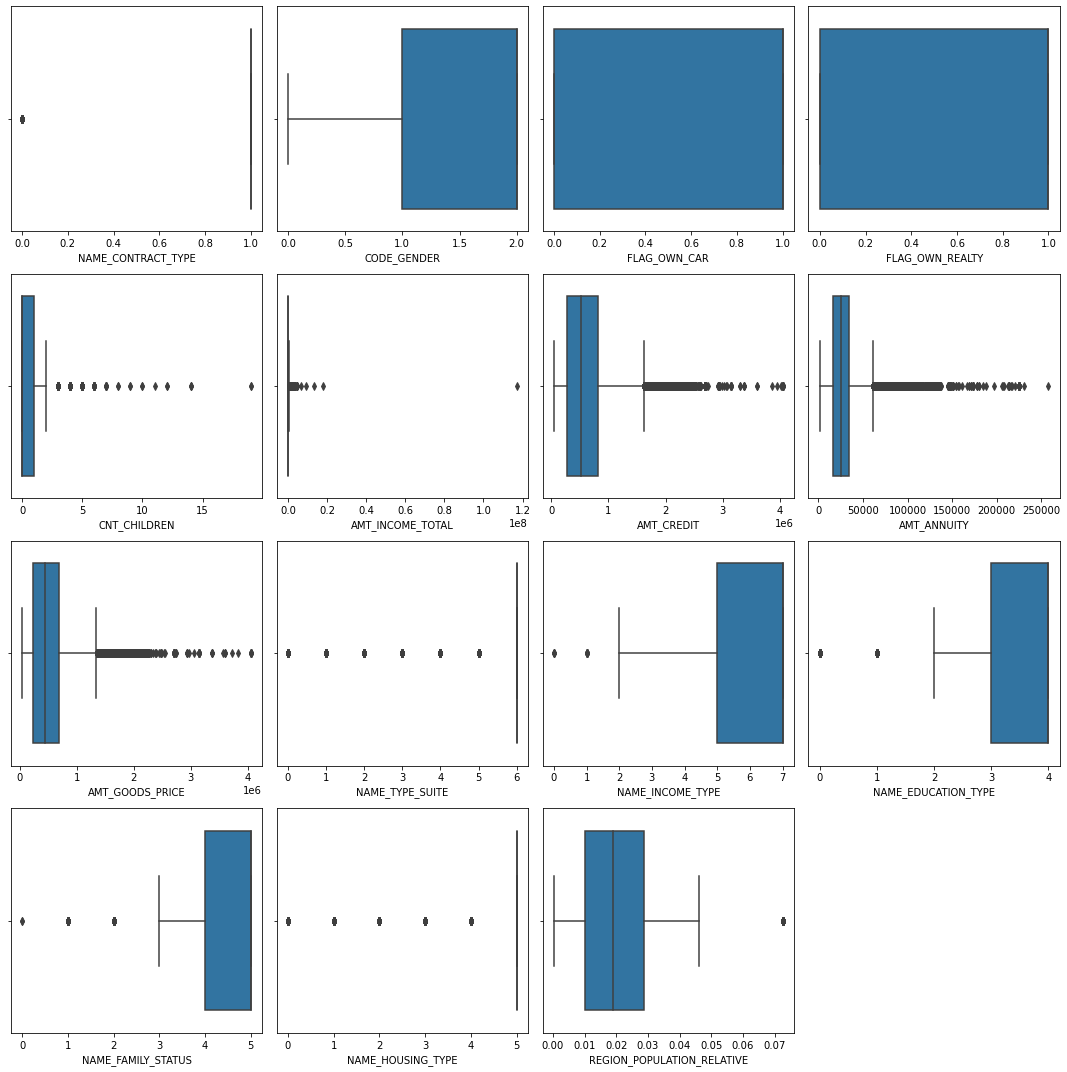

In [156]:
# plotting box plot to check Outliers
plt.figure(figsize=(15,15))
plt_num=1
for col in Out_col1:
    ax=plt.subplot(4,4,plt_num)
    sns.boxplot(data[col])
    plt_num +=1
plt.tight_layout()

In [157]:
# lets check the percentage of Outliers in AMT_CREDIT Data_feature
Q1_AC=data['AMT_CREDIT'].quantile(0.25)
Q3_AC=data['AMT_CREDIT'].quantile(0.75)
IQR_AC=Q3_AC-Q1_AC
up_limit_AC= Q3_AC + (1.5*IQR_AC)
lo_limit_AC= Q1_AC - (1.5*IQR_AC)
OL_AMT_CREDIT= len(data.loc[data['AMT_CREDIT']> up_limit_AC  ])/len(data['AMT_CREDIT']) * 100
print("Percentage of Outliers in AMT_CREDIT:", OL_AMT_CREDIT)

Percentage of Outliers in AMT_CREDIT: 2.13390740493836


In [158]:
# lets check the percentage of Outliers in AMT_ANNUITY Data_feature
Q1_AA=data['AMT_ANNUITY'].quantile(0.25)
Q3_AA=data['AMT_ANNUITY'].quantile(0.75)
IQR_AA=Q3_AA-Q1_AA
up_limit_AA= Q3_AA + (1.5*IQR_AA)
lo_limit_AA= Q1_AA - (1.5*IQR_AA)
OL_AMT_ANNUITY= len(data.loc[data['AMT_ANNUITY']> up_limit_AA  ])/len(data['AMT_ANNUITY']) * 100
print("Percentage of Outliers in AMT_ANNUITY:", OL_AMT_ANNUITY)

Percentage of Outliers in AMT_ANNUITY: 2.4402379101885785


In [159]:
# lets check the percentage of Outliers in AMT_GOODS_PRICE Data_feature
Q1_AGP=data['AMT_GOODS_PRICE'].quantile(0.25)
Q3_AGP=data['AMT_GOODS_PRICE'].quantile(0.75)
IQR_AGP=Q3_AGP-Q1_AGP
up_limit_AGP= Q3_AGP + (1.5*IQR_AGP)
lo_limit_AGP= Q1_AGP - (1.5*IQR_AGP)
OL_AMT_GP= len(data.loc[data['AMT_GOODS_PRICE']> up_limit_AGP  ])/len(data['AMT_GOODS_PRICE']) * 100
print("Percentage of Outliers in AMT_GOODS_PRICE:", OL_AMT_GP)

Percentage of Outliers in AMT_GOODS_PRICE: 4.789422167011912


###### not treating Outliers as these are Less than 5% and this data may be impotant

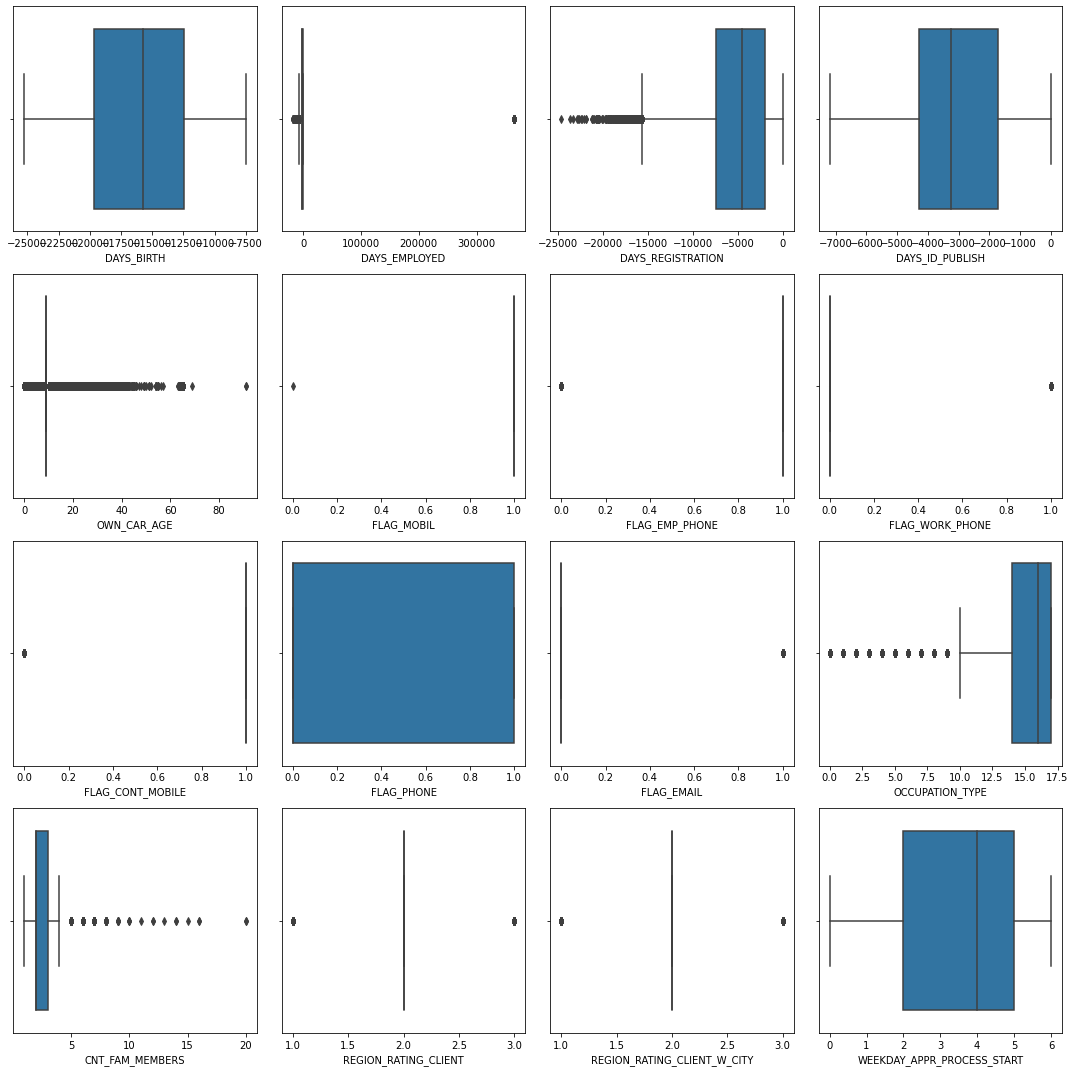

In [160]:
# plotting box plot to check Outliers
plt.figure(figsize=(15,15))
plt_num=1
for col in Out_col2:
    ax=plt.subplot(4,4,plt_num)
    sns.boxplot(data[col])
    plt_num +=1
plt.tight_layout()

In [161]:
# lets check the percentage of Outliers in DAYS_EMPLOYED Data_feature
Q1_DE=data['DAYS_EMPLOYED'].quantile(0.25)
Q3_DE=data['DAYS_EMPLOYED'].quantile(0.75)
IQR_DE=Q3_DE-Q1_DE
up_limit_DE= Q3_DE + (1.5*IQR_DE)
lo_limit_DE= Q1_DE - (1.5*IQR_DE)
OL_DE= len(data.loc[data['DAYS_EMPLOYED']> up_limit_DE  ])/len(data['DAYS_EMPLOYED']) * 100
print("Percentage of Outliers in DAYS_EMPLOYED:", OL_DE)

Percentage of Outliers in DAYS_EMPLOYED: 18.00716071945394


In [162]:
# lets treat outliers by imputing with median values of DAYS_EMPLOYED
med_DE=data.loc[data['DAYS_EMPLOYED'] != 365243 ,'DAYS_EMPLOYED'].median()
data.loc[data['DAYS_EMPLOYED']> up_limit_DE ,'DAYS_EMPLOYED']=med_DE

In [163]:
# lets check the percentage of Outliers in DAYS_REGISTRATION Data_feature
Q1_DR=data['DAYS_REGISTRATION'].quantile(0.25)
Q3_DR=data['DAYS_REGISTRATION'].quantile(0.75)
IQR_DR=Q3_DR-Q1_DR
up_limit_DR= Q3_DR + (1.5*IQR_DR)
lo_limit_DR= Q1_DR - (1.5*IQR_DR)
OL_DR= len(data.loc[data['DAYS_REGISTRATION']< lo_limit_DR])/len(data['DAYS_REGISTRATION']) * 100
print("Percentage of Outliers in DAYS_REGISTRATION:", OL_DR)

Percentage of Outliers in DAYS_REGISTRATION: 0.21430127702748844


In [164]:
# lets check the percentage of Outliers in OWN_CAR_AGE Data_feature
Q1_OC=data['OWN_CAR_AGE'].quantile(0.25)
Q3_OC=data['OWN_CAR_AGE'].quantile(0.75)
IQR_OC=Q3_OC-Q1_OC
up_limit_OC= Q3_OC + (1.5*IQR_OC)
lo_limit_OC= Q1_OC - (1.5*IQR_OC)
OL_OC= len(data.loc[data['OWN_CAR_AGE']> up_limit_OC])/len(data['OWN_CAR_AGE']) * 100
print("Percentage of Outliers in OWN_CAR_AGE:", OL_OC)

Percentage of Outliers in OWN_CAR_AGE: 16.61111309839323


In [165]:
data.loc[data['OWN_CAR_AGE'] < up_limit_OC ,'OWN_CAR_AGE'].median()

4.0

In [166]:
# lets treat outliers by imputing with median values of DAYS_EMPLOYED
med_OC=data.loc[data['OWN_CAR_AGE'] < up_limit_OC ,'OWN_CAR_AGE'].median()
data.loc[data['OWN_CAR_AGE']> up_limit_DE ,'OWN_CAR_AGE']=med_OC

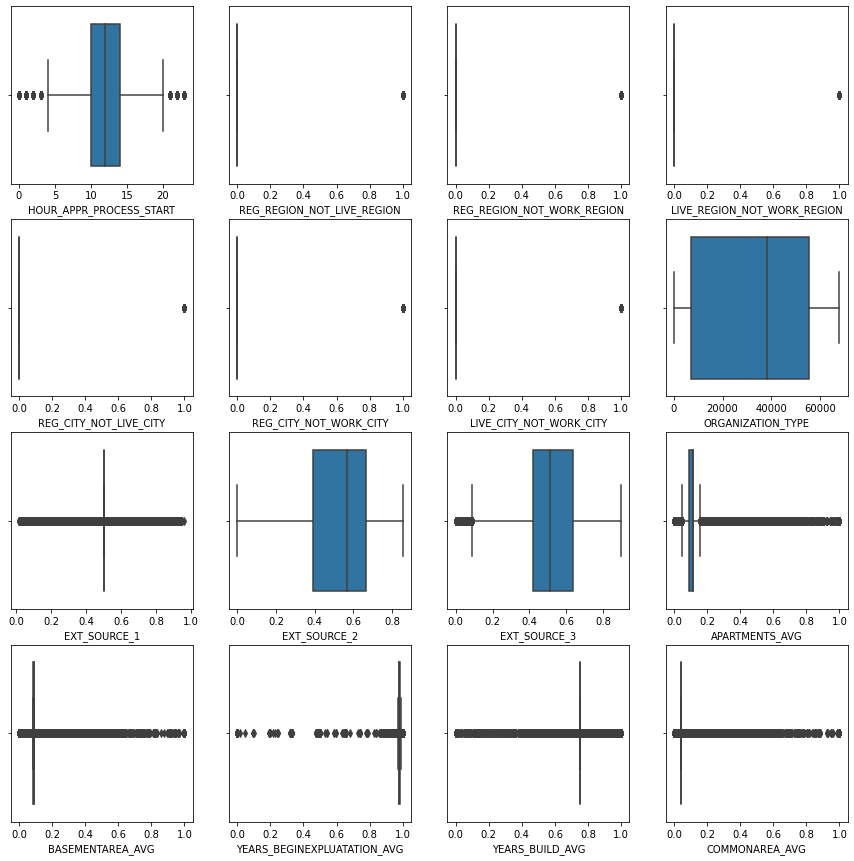

<Figure size 432x288 with 0 Axes>

In [167]:
# plotting box plot to check Outliers
plt.figure(figsize=(15,15))
plt_num=1
for col in Out_col3:
    ax=plt.subplot(4,4,plt_num)
    sns.boxplot(data[col])
    plt_num +=1
plt.show()
plt.tight_layout()

* Above all features are categorial and datapoints befond upper and Lower bound might be essential data

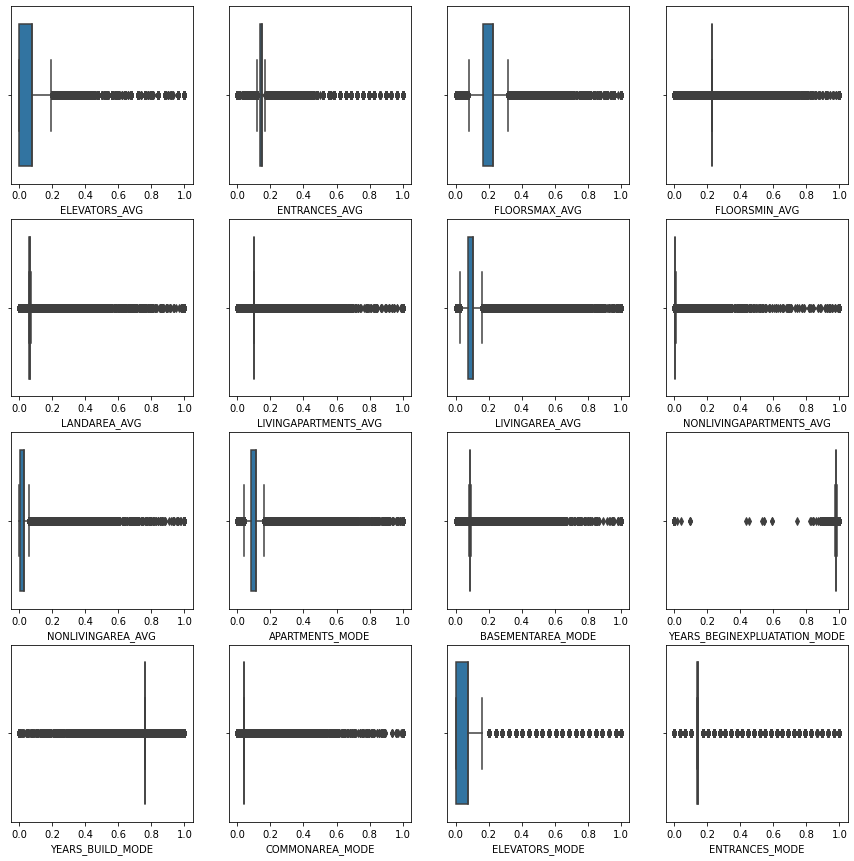

<Figure size 432x288 with 0 Axes>

In [168]:
# plotting box plot to check Outliers
plt.figure(figsize=(15,15))
plt_num=1
for col in Out_col4:
    ax=plt.subplot(4,4,plt_num)
    sns.boxplot(data[col])
    plt_num +=1
plt.show()
plt.tight_layout()

* Above all features are categorial and datapoints befond upper and Lower bound might be essential data

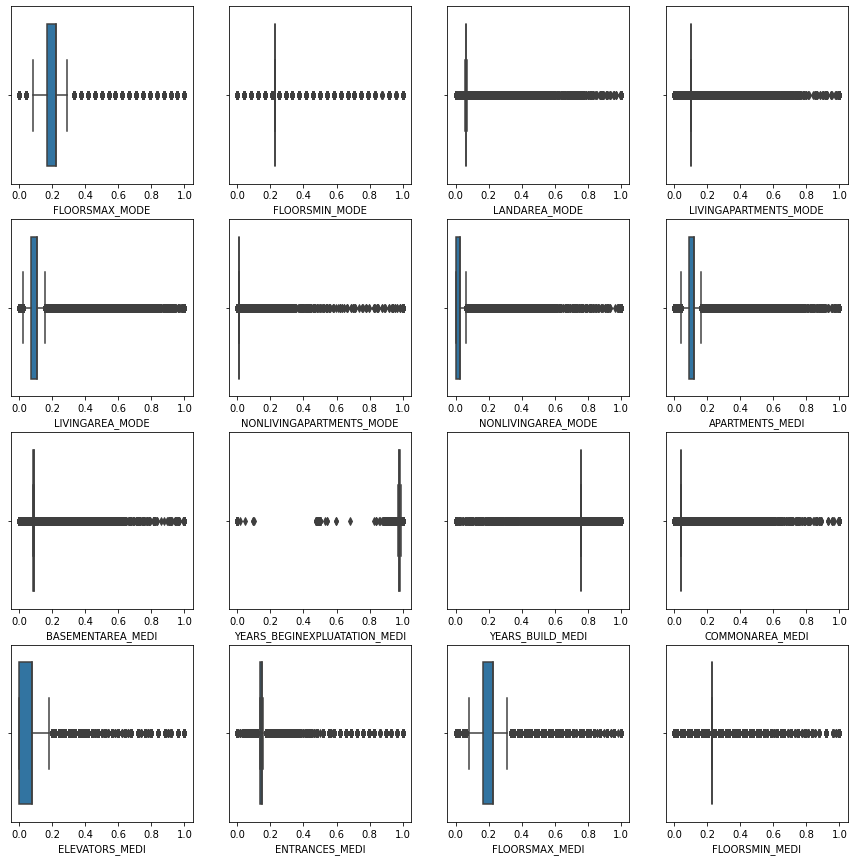

<Figure size 432x288 with 0 Axes>

In [169]:
# plotting box plot to check Outliers
plt.figure(figsize=(15,15))
plt_num=1
for col in Out_col5:
    ax=plt.subplot(4,4,plt_num)
    sns.boxplot(data[col])
    plt_num +=1
plt.show()
plt.tight_layout()

* Above all features are categorial and datapoints befond upper and Lower bound might be essential data

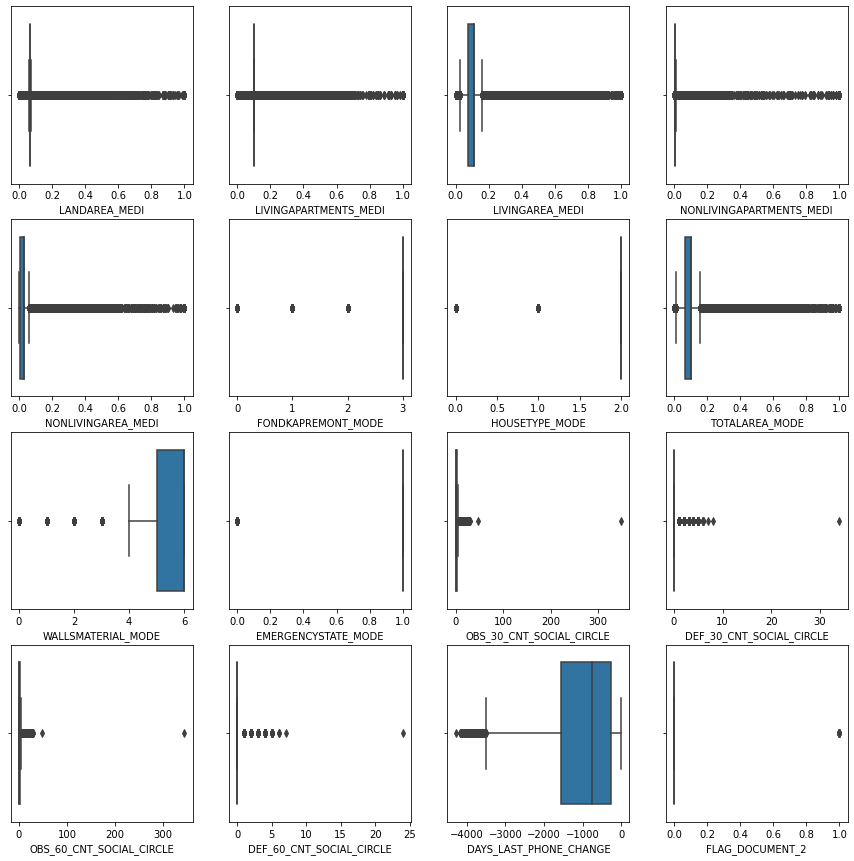

<Figure size 432x288 with 0 Axes>

In [170]:
# plotting box plot to check Outliers
plt.figure(figsize=(15,15))
plt_num=1
for col in Out_col6:
    ax=plt.subplot(4,4,plt_num)
    sns.boxplot(data[col])
    plt_num +=1
plt.show()
plt.tight_layout()

In [171]:
# lets check the percentage of Outliers in DAYS_LAST_PHONE_CHANGE Data_feature
Q1_DLC=data['DAYS_LAST_PHONE_CHANGE'].quantile(0.25)
Q3_DLC=data['DAYS_LAST_PHONE_CHANGE'].quantile(0.75)
IQR_DLC=Q3_DLC-Q1_DLC
up_limit_DLC= Q3_DLC + (1.5*IQR_DLC)
lo_limit_DLC= Q1_DLC - (1.5*IQR_DLC)
OL_DLC= len(data.loc[data['DAYS_LAST_PHONE_CHANGE']< lo_limit_DLC])/len(data['DAYS_LAST_PHONE_CHANGE']) * 100
print("Percentage of Outliers in DAYS_LAST_PHONE_CHANGE:", OL_DLC)

Percentage of Outliers in DAYS_LAST_PHONE_CHANGE: 0.14145835433529208


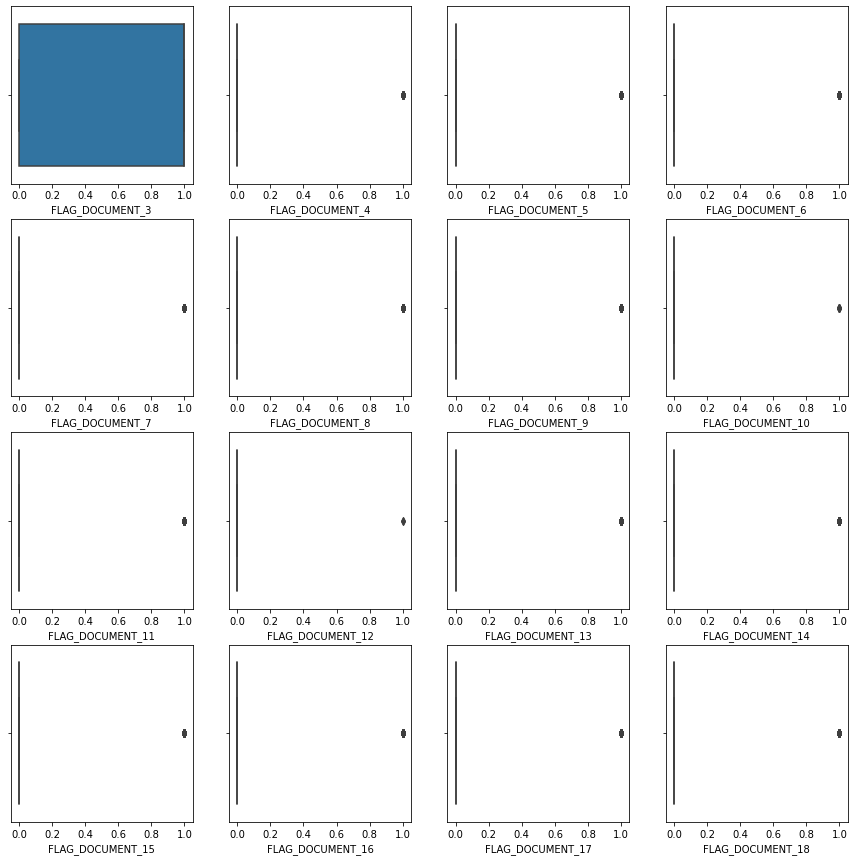

<Figure size 432x288 with 0 Axes>

In [172]:
# plotting box plot to check Outliers
plt.figure(figsize=(15,15))
plt_num=1
for col in Out_col7:
    ax=plt.subplot(4,4,plt_num)
    sns.boxplot(data[col])
    plt_num +=1
plt.show()
plt.tight_layout()

* Above all features are categorial and datapoints befond upper and Lower bound might be essential data

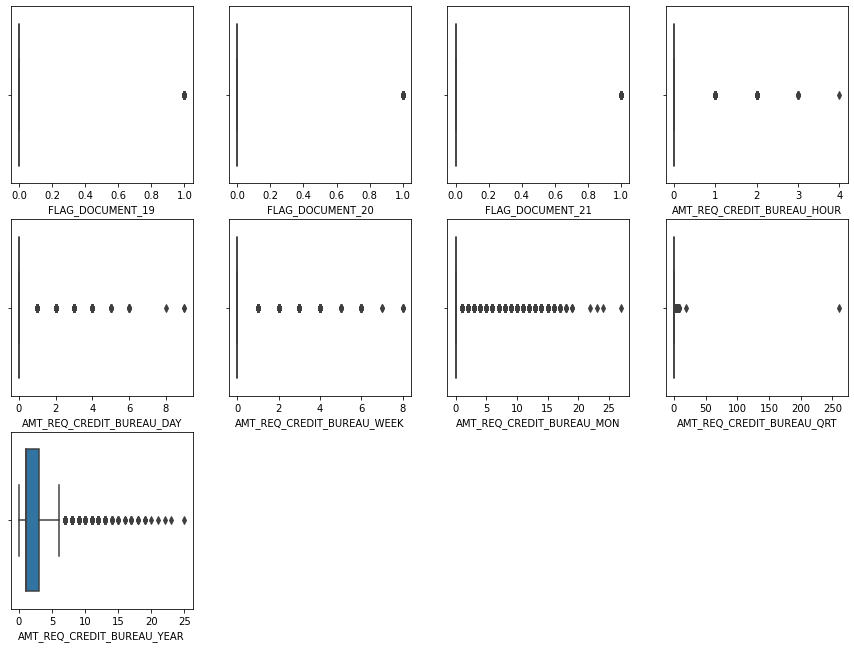

<Figure size 432x288 with 0 Axes>

In [173]:
# plotting box plot to check Outliers
plt.figure(figsize=(15,15))
plt_num=1
for col in Out_col8:
    ax=plt.subplot(4,4,plt_num)
    sns.boxplot(data[col])
    plt_num +=1
plt.show()
plt.tight_layout()

* Above features are mostly categorial and datapoints befond upper and Lower bound might be essential data

## Data Scaling:

In [174]:
data.head(10)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   1            1             1   
1      100003       0                   1            2             1   
2      100004       0                   0            1             0   
3      100006       0                   1            2             1   
4      100007       0                   1            1             1   
5      100008       0                   1            1             1   
6      100009       0                   1            2             0   
7      100010       0                   1            1             0   
8      100011       0                   1            2             1   
9      100012       0                   0            1             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   
5                1             0           99000.0    490495.5      27517.5   
6                1             1          171000.0   1560726.0      41301.0   
7                1             0          360000.0   1530000.0      42075.0   
8                1             0          112500.0   1019610.0      33826.5   
9                1             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         351000.0                6                 7                    4   
1        1129500.0                5                 4                    3   
2         135000.0                6                 7                    4   
3         297000.0                6                 7                    4   
4         513000.0                6                 7                    4   
5         454500.0                4                 4                    4   
6        1395000.0                6                 6                    3   
7        1530000.0                6                 4                    3   
8         913500.0                3                 5                    4   
9         405000.0                6                 7                    4   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                   4                  5                    0.018801   
1                   5                  5                    0.003541   
2                   4                  5                    0.010032   
3                   3                  5                    0.008019   
4                   4                  5                    0.028663   
5                   5                  5                    0.035792   
6                   5                  5                    0.035792   
7                   5                  5                    0.003122   
8                   5                  5                    0.018634   
9                   4                  5                    0.019689   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          9.0   
1      -16765          -1188            -1186.0             -291          9.0   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437          9.0   
4      -19932          -3038            -4311.0            -3458          9.0   
5      -16941          -1588            -4970.0             -477          9.0   
6      -13778          -3130            -1213.0             -619         17.0   
7      -18850           -449            

In [175]:
# lets find some continuous features to scale
cont_featurtes=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
               'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','ORGANIZATION_TYPE','DAYS_LAST_PHONE_CHANGE']

In [176]:
# lets use minmax scaler as data is not  normally distributed in almost all features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

data[cont_featurtes] = scaler.fit_transform(data[cont_featurtes])

# Feature Selection Techniques

##### Heatmap for Correlation

In [168]:
correlation=data.corr()

<AxesSubplot:>

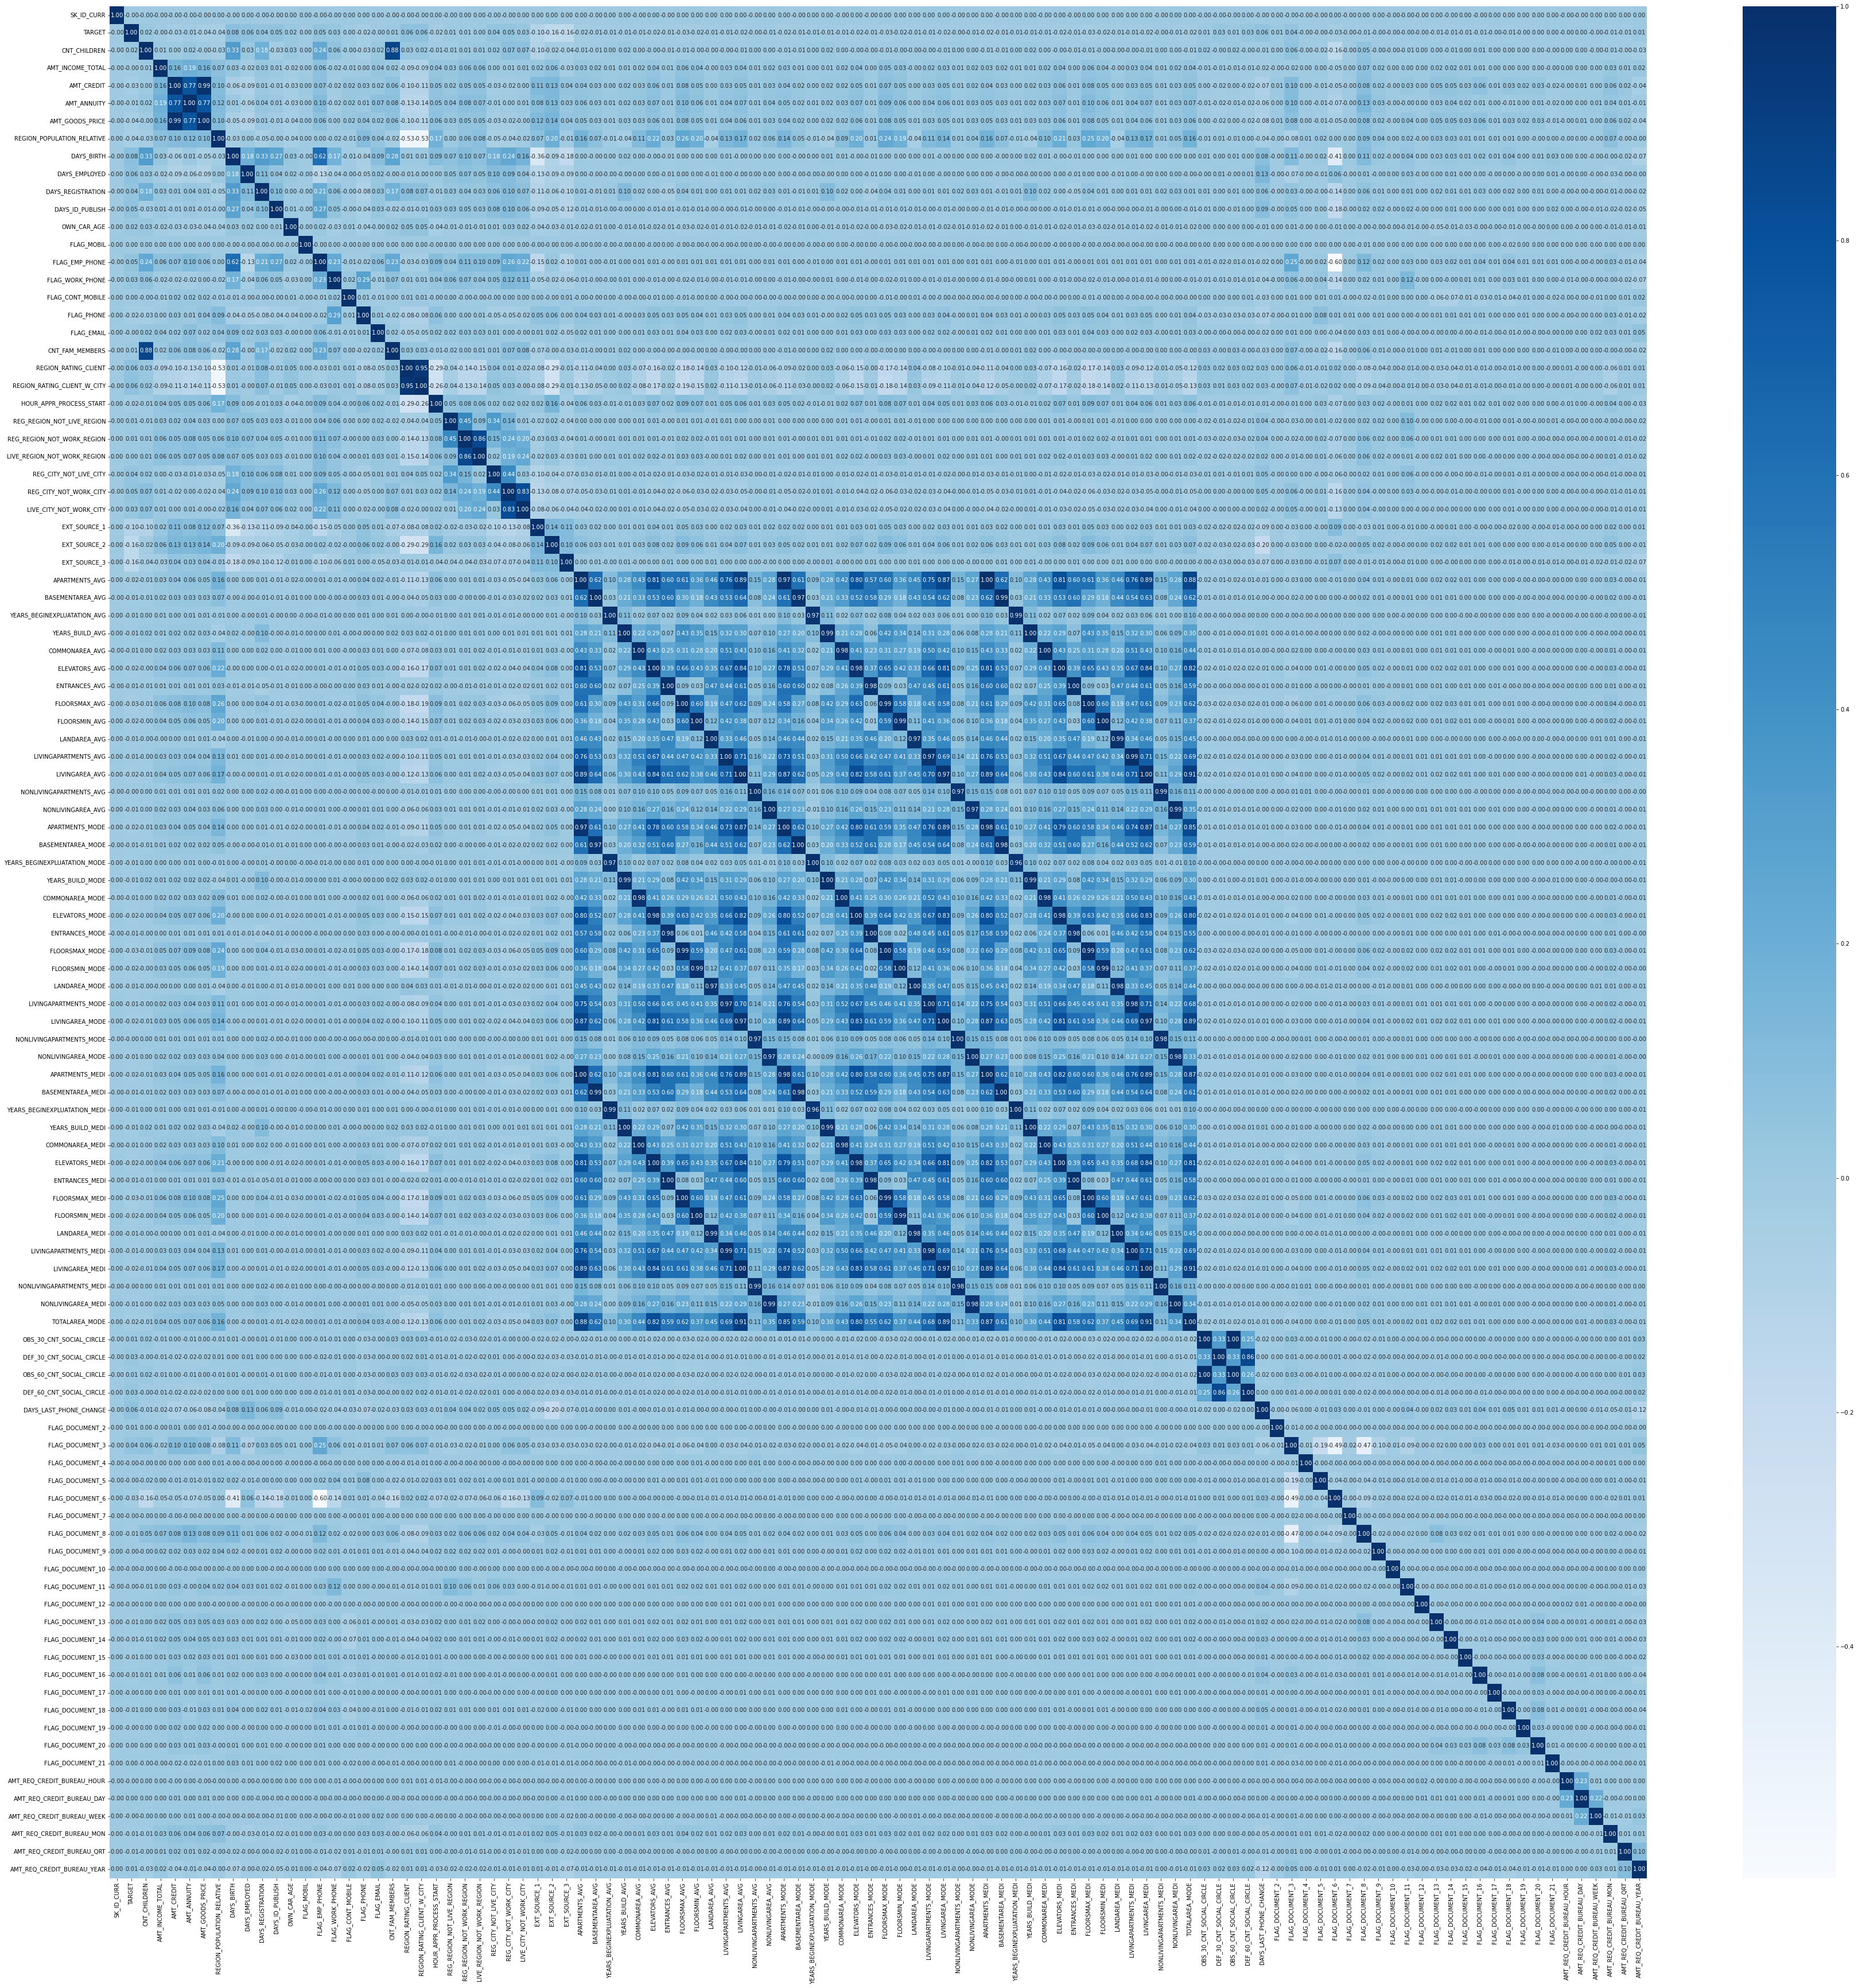

In [169]:
plt.figure(figsize=(60,60))
sns.heatmap(data[Numerical_col].corr(),annot=True, fmt='.2f',cmap='Blues')

<AxesSubplot:>

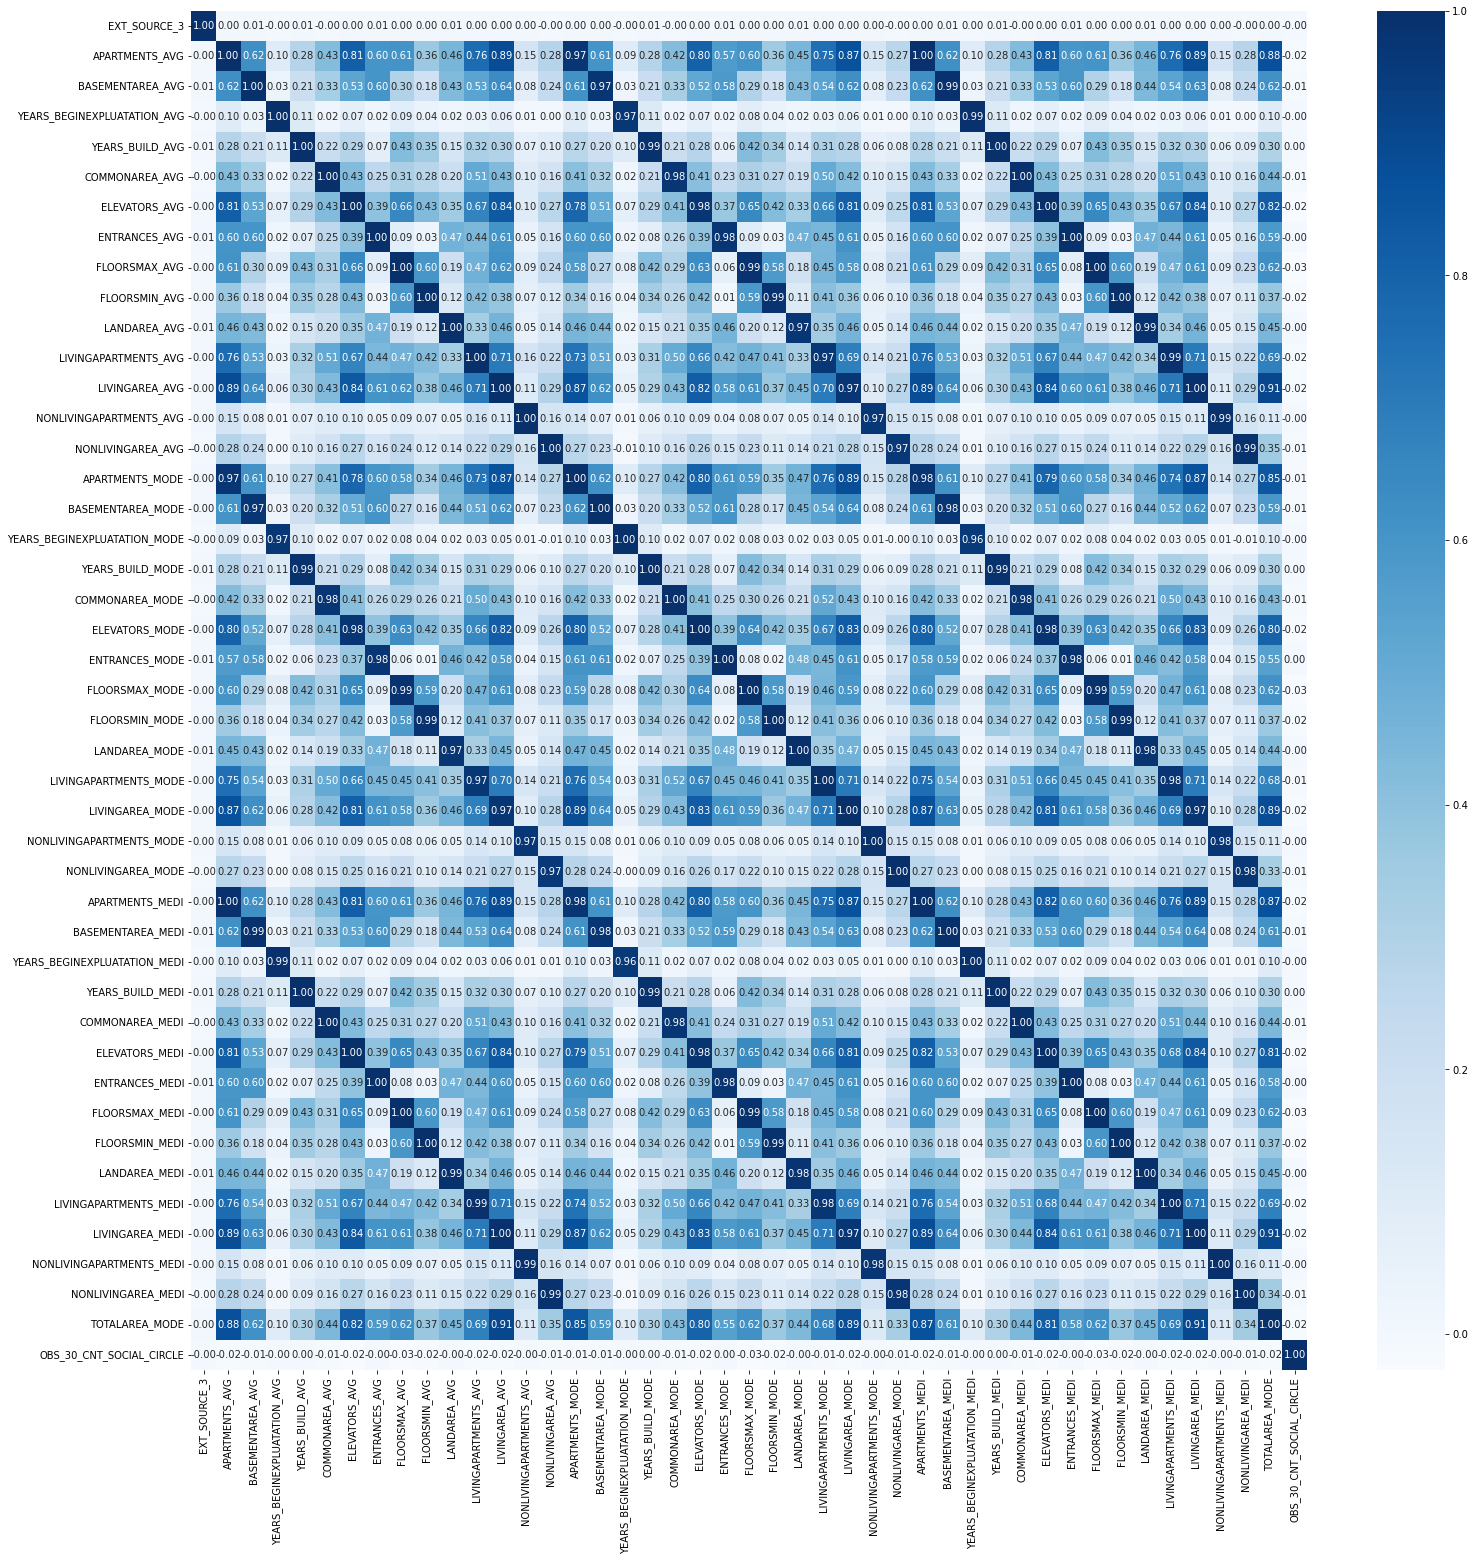

In [170]:
# lets check the correlation at middle of the above graph
plt.figure(figsize=(25,25))
sns.heatmap(data[Numerical_col[31:76]].corr(),annot=True, fmt='.2f',cmap='Blues')


<AxesSubplot:>

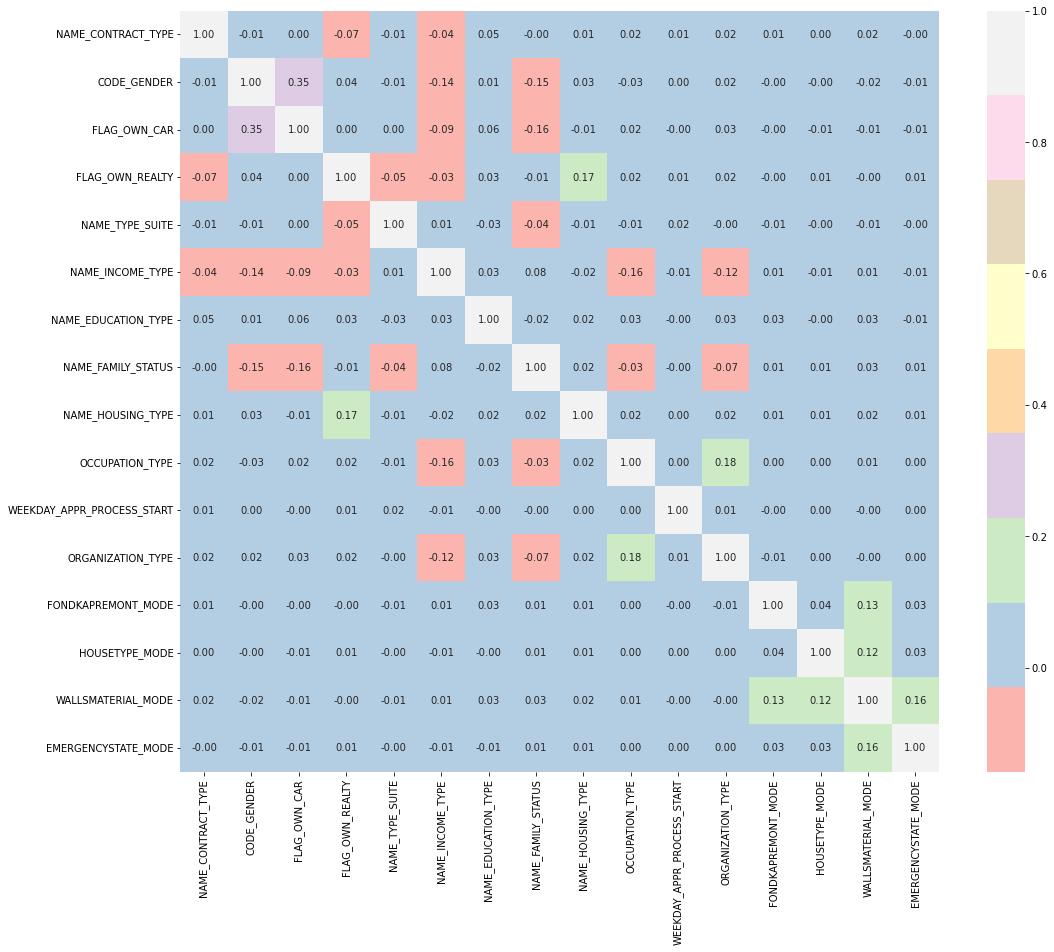

In [171]:
# lets check the correlation between categorical values
plt.figure(figsize=(17,14))
sns.heatmap(data[cat_features].corr(),annot=True, fmt='.2f',cmap='Pastel1')

In [172]:
correlation.iloc[40:90,:]

SK_ID_CURR    TARGET  NAME_CONTRACT_TYPE  \
ORGANIZATION_TYPE              -0.000138  0.001282            0.016961   
EXT_SOURCE_1                    0.000054 -0.099152            0.009425   
EXT_SOURCE_2                    0.002339 -0.160303           -0.015947   
EXT_SOURCE_3                    0.000199 -0.157397            0.005109   
APARTMENTS_AVG                  0.001093 -0.019336           -0.009645   
BASEMENTAREA_AVG               -0.001336 -0.013619           -0.002836   
YEARS_BEGINEXPLUATATION_AVG     0.001110 -0.006518            0.000778   
YEARS_BUILD_AVG                 0.003418 -0.011901           -0.003806   
COMMONAREA_AVG                 -0.000804 -0.009479           -0.005025   
ELEVATORS_AVG                   0.003326 -0.021745           -0.011929   
ENTRANCES_AVG                  -0.002030 -0.012612            0.000154   
FLOORSMAX_AVG                   0.003441 -0.029145           -0.018863   
FLOORSMIN_AVG                   0.001751 -0.017727           -0.015283   
LANDAREA_AVG                    0.000935 -0.006490           -0.001385   
LIVINGAPARTMENTS_AVG            0.001756 -0.013090           -0.008561   
LIVINGAREA_AVG                  0.001250 -0.021804           -0.012623   
NONLIVINGAPARTMENTS_AVG        -0.001425 -0.001635           -0.003561   
NONLIVINGAREA_AVG               0.002039 -0.008451           -0.011388   
APARTMENTS_MODE                 0.001378 -0.017885           -0.008220   
BASEMENTAREA_MODE              -0.000911 -0.011947           -0.002038   
YEARS_BEGINEXPLUATATION_MODE    0.001353 -0.006055            0.000304   
YEARS_BUILD_MODE                0.003039 -0.011857           -0.003442   
COMMONAREA_MODE                -0.000582 -0.008350           -0.004361   
ELEVATORS_MODE                  0.003432 -0.020430           -0.011198   
ENTRANCES_MODE                 -0.002006 -0.011438            0.000841   
FLOORSMAX_MODE                  0.003112 -0.028631           -0.017662   
FLOORSMIN_MODE                  0.001182 -0.017244           -0.014421   
LANDAREA_MODE                   0.000988 -0.006066           -0.000770   
LIVINGAPARTMENTS_MODE           0.002021 -0.012234           -0.007519   
LIVINGAREA_MODE                 0.001523 -0.020276           -0.011601   
NONLIVINGAPARTMENTS_MODE       -0.001064 -0.000801           -0.002665   
NONLIVINGAREA_MODE              0.001287 -0.007911           -0.009677   
APARTMENTS_MEDI                 0.001397 -0.019131           -0.009022   
BASEMENTAREA_MEDI              -0.001063 -0.013221           -0.002525   
YEARS_BEGINEXPLUATATION_MEDI    0.000978 -0.006696            0.000434   
YEARS_BUILD_MEDI                0.003347 -0.011996           -0.003726   
COMMONAREA_MEDI                -0.000569 -0.009491           -0.004974   
ELEVATORS_MEDI                  0.003466 -0.021531           -0.011676   
ENTRANCES_MEDI                 -0.001821 -0.012515            0.000191   
FLOORSMAX_MEDI                  0.003255 -0.028989           -0.018625   
FLOORSMIN_MEDI                  0.001611 -0.017611           -0.014998   
LANDAREA_MEDI                   0.001084 -0.006711           -0.001193   
LIVINGAPARTMENTS_MEDI           0.001842 -0.012876           -0.008250   
LIVINGAREA_MEDI                 0.001557 -0.021634           -0.012332   
NONLIVINGAPARTMENTS_MEDI       -0.001671 -0.001419           -0.002983   
NONLIVINGAREA_MEDI              0.001636 -0.008301           -0.011078   
FONDKAPREMONT_MODE             -0.000976  0.014576            0.011133   
HOUSETYPE_MODE                 -0.001138 -0.003445            0.000037   
TOTALAREA_MODE                  0.001647 -0.021943           -0.012785   
WALLSMATERIAL_MODE              0.000952  0.009374            0.016546   

                              CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
ORGANIZATION_TYPE                0.017028      0.032668     2.266589e-02   
EXT_SOURCE_1                     0.198702      0.039248     5.395517e-02   
EXT_SOURCE_2               

In [177]:
"""
i wanna drop indipendent features having high correlation with other indipendent features ( corr>0.9), 
 and low correlation with Target 
"""
data.drop(['AMT_CREDIT','REGION_RATING_CLIENT','APARTMENTS_MODE','APARTMENTS_MEDI','BASEMENTAREA_MODE','BASEMENTAREA_MEDI',
           'YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','YEARS_BUILD_MODE',
           'COMMONAREA_AVG','COMMONAREA_MODE','ELEVATORS_MODE','ELEVATORS_MEDI','ENTRANCES_MODE','ENTRANCES_MEDI',
           'FLOORSMAX_MODE','FLOORSMAX_MEDI','OBS_30_CNT_SOCIAL_CIRCLE','FLOORSMIN_MODE','FLOORSMIN_MEDI',
           'LANDAREA_AVG','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_MEDI','LIVINGAREA_AVG',
           'LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MODE','NONLIVINGAREA_MEDI'
          ], axis=1,inplace=True)

In [178]:
len(data.columns)

91

In [179]:
# lets check for duplicated data points
data.duplicated().sum()

0

### Feature importance test:

In [180]:
X_features = data.drop(['TARGET','SK_ID_CURR'],axis=1)
y_features = data['TARGET']

In [181]:
# lets find the best features using Extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(X_features,y_features)

ExtraTreesClassifier()

<AxesSubplot:>

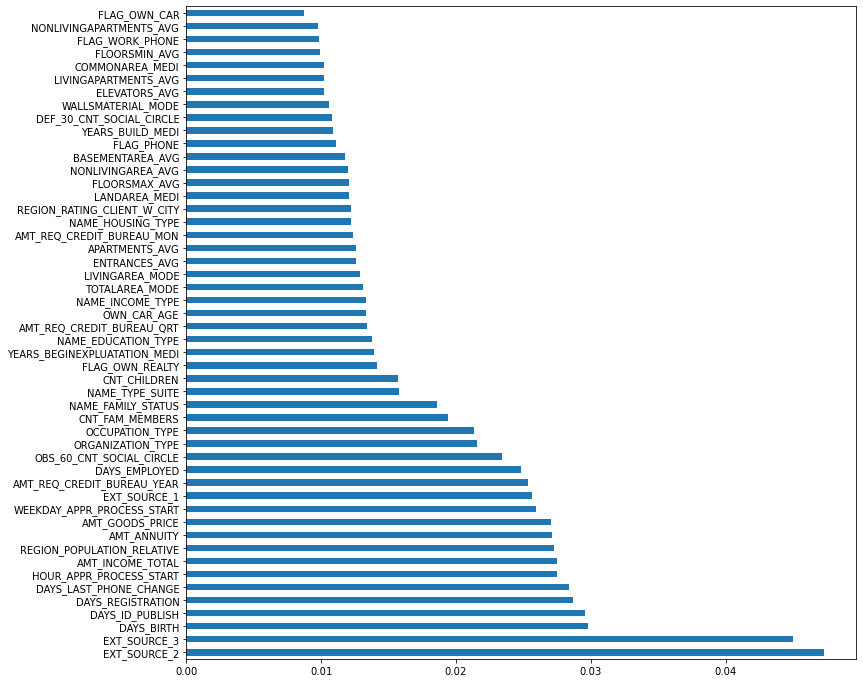

In [182]:
# lets create a Pandas Series for features_scores and plot graph for the same
feat_imp=pd.Series(extra.feature_importances_,index=X_features.columns)
plt.figure(figsize=(12,12))
feat_imp.nlargest(50).plot(kind='barh')

In [183]:
feat_imp.sort_values(ascending=False).head(20)

EXT_SOURCE_2                  0.047296
EXT_SOURCE_3                  0.044999
DAYS_BIRTH                    0.029802
DAYS_ID_PUBLISH               0.029564
DAYS_REGISTRATION             0.028683
DAYS_LAST_PHONE_CHANGE        0.028373
HOUR_APPR_PROCESS_START       0.027518
AMT_INCOME_TOTAL              0.027516
REGION_POPULATION_RELATIVE    0.027234
AMT_ANNUITY                   0.027110
AMT_GOODS_PRICE               0.027011
WEEKDAY_APPR_PROCESS_START    0.025950
EXT_SOURCE_1                  0.025628
AMT_REQ_CREDIT_BUREAU_YEAR    0.025369
DAYS_EMPLOYED                 0.024819
OBS_60_CNT_SOCIAL_CIRCLE      0.023397
ORGANIZATION_TYPE             0.021591
OCCUPATION_TYPE               0.021344
CNT_FAM_MEMBERS               0.019386
NAME_FAMILY_STATUS            0.018581
dtype: float64

In [288]:
# lets create a list with final filterd featuters
final_features=feat_imp.sort_values(ascending=False).head(45).index
final_features

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE',
       'HOUR_APPR_PROCESS_START', 'AMT_INCOME_TOTAL',
       'REGION_POPULATION_RELATIVE', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'EXT_SOURCE_1',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_EMPLOYED',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS', 'NAME_TYPE_SUITE',
       'CNT_CHILDREN', 'FLAG_OWN_REALTY', 'YEARS_BEGINEXPLUATATION_MEDI',
       'NAME_EDUCATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'OWN_CAR_AGE',
       'NAME_INCOME_TYPE', 'TOTALAREA_MODE', 'LIVINGAREA_MODE',
       'ENTRANCES_AVG', 'APARTMENTS_AVG', 'AMT_REQ_CREDIT_BUREAU_MON',
       'NAME_HOUSING_TYPE', 'REGION_RATING_CLIENT_W_CITY', 'LANDAREA_MEDI',
       'FLOORSMAX_AVG', 'NONLIVINGAREA_AVG', 'BASEMENTAREA_AVG', 'FLAG_PHONE',
       'YEARS_BUILD_MEDI', 'DEF_30_CNT_SOCIAL_CIRCLE', 'WALLSM

### Approach1: I have trained the models with all 89 features but models not performing well for test data

### Approach2: I have tried using top 60 features having high impact on Target, but models not performing well

### Approach3: I have tried using top 40 features having high impact on Target, but models not performing well

### Approach4: At last tried using top 45 features having high impact on Target,this approcah is giving good results with the models compared to remaining approaches

In [289]:
# lets update our data set with top features 
data_new=data[final_features]

In [290]:
data_new.shape

(307511, 45)

# Model Creation

In [291]:
# lets split the data into X and y for training and testing 
X = data_new
y = data['TARGET']

In [292]:
# lets split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30, random_state=42)

In [293]:
# lets check the 'TARGET' distribution is balanced or not
data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

## Logistic Regression without Balancing the data

In [294]:
# lets import the model and train the model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=16)

# lets fit the model with train and test data

LR.fit(X_train,y_train)

LogisticRegression(random_state=16)

In [295]:
# lets predict the raget for test data
y_pred = LR.predict(X_test)

In [296]:
# metrics for performance evolution
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

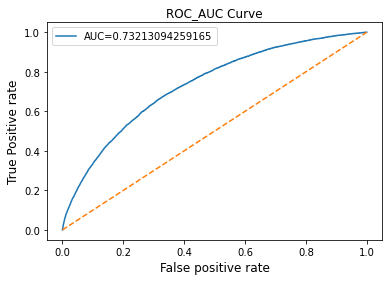

In [297]:
# lets draw an ROC_AUC curve for the model performance
y_pred_prob = LR.predict_proba(X_test)[::,1]
fpr,tpr,threshold = roc_curve( y_test, y_pred_prob)
AUC = roc_auc_score( y_test, y_pred_prob)
plt.plot(fpr,tpr, label='AUC='+str(AUC))
plt.plot([0,1],[0,1], linestyle="--")                # this is to plot a 45 degree straight line
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True Positive rate',fontsize=12)
plt.legend(loc=2)
plt.title("ROC_AUC Curve")
plt.show()

In [298]:
# lets check confusion matrix
pd.crosstab(y_test, y_pred)

col_0       0   1
TARGET           
0       84785  56
1        7377  36

In [299]:
# lets check classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.39      0.00      0.01      7413

    accuracy                           0.92     92254
   macro avg       0.66      0.50      0.48     92254
weighted avg       0.88      0.92      0.88     92254



In [300]:
# lets check classification report for training data
y_pred_train = LR.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    197845
           1       0.47      0.01      0.01     17412

    accuracy                           0.92    215257
   macro avg       0.69      0.50      0.48    215257
weighted avg       0.88      0.92      0.88    215257



###### model AUC score is good but Recall- for 1 is too low without balancing the data, so i would like to Balance the data to improve model performance to get Good score for Recall-1

# After Data Balancing

In [301]:
# lets balance the data using SMOTE 
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=16)
X_train,y_train=smote.fit_resample(X_train, y_train)

In [302]:
print(X_train.shape)
print(y_train.value_counts())

(395690, 45)
0    197845
1    197845
Name: TARGET, dtype: int64


## Logistic Regression

In [303]:
# lets import the model and train the model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=16)

# lets fit the model with train and test data

LR.fit(X_train,y_train)

LogisticRegression(random_state=16)

In [304]:
# lets predict the raget for test data
y_pred = LR.predict(X_test)

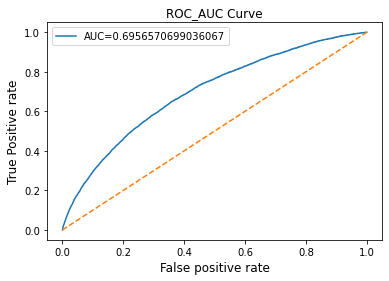

In [305]:
# metrics for performance evolution
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

# lets draw an ROC_AUC curve for the model performance
y_pred_prob = LR.predict_proba(X_test)[::,1]
fpr,tpr,threshold = roc_curve( y_test, y_pred_prob)
AUC = roc_auc_score( y_test, y_pred_prob)
plt.plot(fpr,tpr, label='AUC='+str(AUC))
plt.plot([0,1],[0,1], linestyle="--")                # this is to plot a 45 degree straight line
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True Positive rate',fontsize=12)
plt.legend(loc=2)
plt.title("ROC_AUC Curve")
plt.show()

In [306]:
# lets check classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81     84841
           1       0.15      0.57      0.23      7413

    accuracy                           0.70     92254
   macro avg       0.55      0.64      0.52     92254
weighted avg       0.89      0.70      0.77     92254



In [307]:
# lets check classification report for training data
y_pred_train = LR.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71    197845
           1       0.71      0.72      0.72    197845

    accuracy                           0.72    395690
   macro avg       0.72      0.72      0.72    395690
weighted avg       0.72      0.72      0.72    395690



##### after data balancing Recall for 1 has improved but still model not performing well

# Logistic regression with Cross Validation

In [308]:
# lets import Logisticregresion cv model and train the model
from sklearn.linear_model import LogisticRegressionCV
Lrcv=LogisticRegressionCV( cv=5)
Lrcv.fit(X_train,y_train)

LogisticRegressionCV(cv=5)

In [309]:
# lets predict and evalute the model
y_pred_cv=Lrcv.predict(X_test)

print(classification_report(y_test,y_pred_cv))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81     84841
           1       0.15      0.57      0.23      7413

    accuracy                           0.70     92254
   macro avg       0.55      0.64      0.52     92254
weighted avg       0.88      0.70      0.77     92254



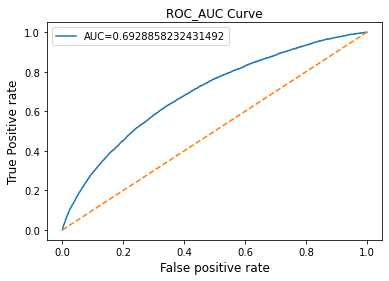

In [310]:
# lets draw an ROC_AUC curve for the model performance
y_pred_prob_cv = Lrcv.predict_proba(X_test)[::,1]
fpr,tpr,threshold = roc_curve( y_test, y_pred_prob_cv)
AUC_lrcv = roc_auc_score( y_test, y_pred_prob_cv)
plt.plot(fpr,tpr, label='AUC='+str(AUC_lrcv))
plt.plot([0,1],[0,1], linestyle="--")                # this is to plot a 45 degree straight line
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True Positive rate',fontsize=12)
plt.legend(loc=2)
plt.title("ROC_AUC Curve")
plt.show()

In [311]:
# lets predict and evalute the model for training data
y_pred_train_cv=Lrcv.predict(X_train)

print(classification_report(y_train,y_pred_train_cv))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72    197845
           1       0.72      0.72      0.72    197845

    accuracy                           0.72    395690
   macro avg       0.72      0.72      0.72    395690
weighted avg       0.72      0.72      0.72    395690



##### model performing same with cross calues score=5 also, there are no changes in it's performance

# SVM model

### Model not getting computed for SVM model , even i have tried training the model with 30% data still not computing, tried using Google colab also but nothing working its been running for hours but at last not getting completed. So trying all other models not working on SVM

In [183]:
# as SVM not computing for the entire train data i would like to use 30% entire data for training
# lets split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train_svm, X_test_svm,y_train_svm,y_test_svm=train_test_split(X,y, test_size=0.7, random_state=42)

In [186]:
y_train_svm.value_counts()

0    84835
1     7418
Name: TARGET, dtype: int64

In [187]:
# lets balance the data using SMOTE 
X_train_svm,y_train_svm=smote.fit_resample(X_train_svm, y_train_svm)

In [ ]:
# lets import and train the model
from sklearn.svm import SVC
svm = SVC(random_state=16,probability=True, kernel='linear')

# lets fit the model
svm.fit(X_train_svm, y_train_svm)

In [ ]:
X_test_svm = X_test_svm.iloc[:,:]
y_test_svm = y_test_svm.iloc[:,:]

In [ ]:
# lets predict the target for the test data
y_pred_svm = svm.predict(X_test)

# lets check classification report
print(classification_report(y_test,y_pred_svm))

In [ ]:
# lets draw an ROC_AUC curve for the model performance
y_pred_prob_svm = svm.predict_proba(X_test)[::,1]
fpr,tpr,threshold = roc_curve( y_test, y_pred_prob_svm)
AUC_svm = roc_auc_score( y_test, y_pred_prob_svm)
plt.plot(fpr,tpr, label='AUC='+str(AUC_svm))
plt.plot([0,1],[0,1], linestyle="--")                # this is to plot a 45 degree straight line
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True Positive rate',fontsize=12)
plt.legend(loc=2)
plt.title("ROC_AUC Curve")
plt.show()

In [ ]:
svm.predict_proba(X_test)

## KNeighbors classifier

In [312]:
# lets find the error rate for different 'k' values so that we can plot and find the best 'k'
error_rate=[]

for i in range(1,11):
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_knn=knn.predict(X_test)
    error_rate.append(np.mean(y_pred_knn != y_test))

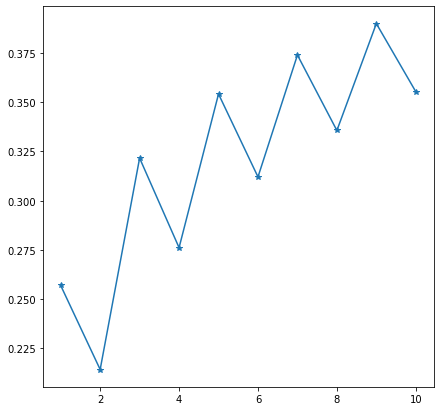

In [313]:
# plot the graph to find the best fit 'k' value
plt.figure(figsize=(7,7))
plt.plot(np.arange(1,11),error_rate, marker='*')

In [314]:
# lets take k=3 and start predicting the model
knn_f=KNeighborsClassifier(n_neighbors=3)
knn_f.fit(X_train,y_train)

# lets predict the target and evalute the model
y_pred_knn_f=knn_f.predict(X_test)

# model evoluation

print(classification_report(y_test,y_pred_knn_f))

              precision    recall  f1-score   support

           0       0.93      0.71      0.80     84841
           1       0.09      0.35      0.15      7413

    accuracy                           0.68     92254
   macro avg       0.51      0.53      0.47     92254
weighted avg       0.86      0.68      0.75     92254



In [315]:
# lets check model performance for the training data
y_pred_train_knn_f=knn_f.predict(X_train)
print(classification_report(y_train,y_pred_train_knn_f))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91    197845
           1       0.86      1.00      0.92    197845

    accuracy                           0.92    395690
   macro avg       0.93      0.92      0.92    395690
weighted avg       0.93      0.92      0.92    395690



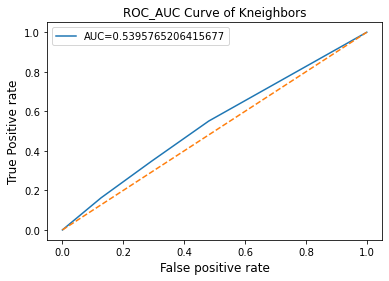

In [316]:
# lets draw an ROC_AUC curve for the model performance
y_pred_prob_knn = knn_f.predict_proba(X_test)[::,1]
fpr,tpr,threshold = roc_curve( y_test, y_pred_prob_knn)
AUC_knn = roc_auc_score( y_test, y_pred_prob_knn)
plt.plot(fpr,tpr, label='AUC='+str(AUC_knn))
plt.plot([0,1],[0,1], linestyle="--")                # this is to plot a 45 degree straight line
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True Positive rate',fontsize=12)
plt.legend(loc=2)
plt.title("ROC_AUC Curve of Kneighbors")
plt.show()

###### model performance not better than logistic regression model and AUC score also very low, and Recall for 1 has not improved compared to previous models

# DecisionTree Classifier

In [317]:
# import and train Decisiontreeclassifier model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [318]:
# predict the model for test data
y_pred_dt=dt.predict(X_test)

# evalution of the model
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88     84841
           1       0.12      0.24      0.16      7413

    accuracy                           0.79     92254
   macro avg       0.52      0.54      0.52     92254
weighted avg       0.86      0.79      0.82     92254



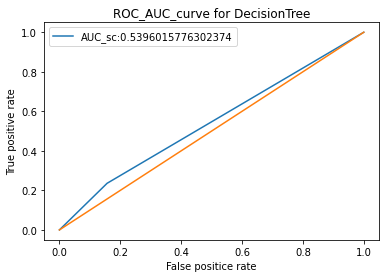

In [319]:
# Lets check AUC score and plot ROC_AUC curve
y_pred_proba_dt=dt.predict_proba(X_test)[::,1]
fpr, tpr, thresh = roc_curve(y_test,y_pred_proba_dt)
AUC_dt=roc_auc_score(y_test,y_pred_proba_dt)
plt.plot(fpr,tpr, label="AUC_sc:"+str(AUC_dt))
plt.plot([0,1],[0,1])             # this for 45degree straight line
plt.xlabel("False positice rate")
plt.ylabel("True positive rate")
plt.title("ROC_AUC_curve for DecisionTree")
plt.legend(loc=2)
plt.show()


In [320]:
# predict the model for train data
y_pred_dt_train=dt.predict(X_train)

# evalution of the model
print(classification_report(y_train,y_pred_dt_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197845
           1       1.00      1.00      1.00    197845

    accuracy                           1.00    395690
   macro avg       1.00      1.00      1.00    395690
weighted avg       1.00      1.00      1.00    395690



###### we can see that model got overfitted with training data and not performing good with test data

In [321]:
# lets do hyper perameter tuning for the Decision tree

params={ "criterion":['gini', 'entropy', 'log_loss'],
        "splitter": ['best','random'],
        "max_depth": [10,30,50,60],
        "min_samples_split":[10,20,30,40,50],
        "max_leaf_nodes":[5,6,8,9,10,20],
        "min_samples_leaf":[1,2,3,4,5]}

In [322]:
# lets get best parameters using Randomised searchCV
from sklearn.model_selection import RandomizedSearchCV
Ran_par=RandomizedSearchCV(DecisionTreeClassifier(random_state=42),param_distributions=params,scoring='f1',
                           verbose=1, cv=3,n_jobs=-1, n_iter=100,random_state=16)

Ran_par.fit(X_train,y_train)
print(Ran_par.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'splitter': 'best', 'min_samples_split': 30, 'min_samples_leaf': 1, 'max_leaf_nodes': 20, 'max_depth': 60, 'criterion': 'gini'}


* 1st fit:'splitter': 'best', 'min_samples_split': 40, 'min_samples_leaf': 3, 'max_leaf_nodes': 20, 'max_depth': 50, 'criterion': 'gini'
* 2nd fit:'splitter': 'best', 'min_samples_split': 30, 'min_samples_leaf': 1, 'max_leaf_nodes': 20, 'max_depth': 60, 'criterion': 'gini'

In [323]:
# lets train the model with new parameters
dt_clf=DecisionTreeClassifier(random_state=42,splitter='best',min_samples_split=30,min_samples_leaf=1,max_leaf_nodes=20,
                              max_depth=60,criterion='gini')

# fitting train data
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=60, max_leaf_nodes=20, min_samples_split=30,
                       random_state=42)

In [324]:
# predict the model for test data
y_pred_dt_clf=dt_clf.predict(X_test)

# evalution of the model
print(classification_report(y_test,y_pred_dt_clf))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     84841
           1       0.14      0.36      0.20      7413

    accuracy                           0.77     92254
   macro avg       0.54      0.58      0.53     92254
weighted avg       0.87      0.77      0.81     92254



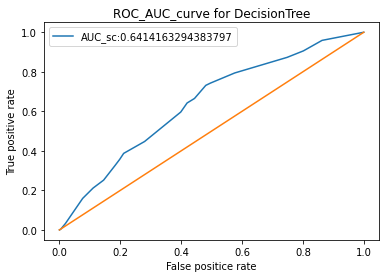

In [325]:
# Lets check AUC score and plot ROC_AUC curve
y_pred_proba_dt_clf=dt_clf.predict_proba(X_test)[::,1]
fpr, tpr, thresh = roc_curve(y_test,y_pred_proba_dt_clf)
AUC_dt_clf=roc_auc_score(y_test,y_pred_proba_dt_clf)
plt.plot(fpr,tpr, label="AUC_sc:"+str(AUC_dt_clf))
plt.plot([0,1],[0,1])             # this for 45degree straight line
plt.xlabel("False positice rate")
plt.ylabel("True positive rate")
plt.title("ROC_AUC_curve for DecisionTree")
plt.legend(loc=2)
plt.show()


##### AUC score and Recall for 1 has improved with hyper parameter tuning but model performance not better than Logistic model

# RandomForest Classifier

In [326]:
# import and ensemble RandomForestCLaasifier model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)

# fitting the data to model
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [327]:
# lets predict and evoluate the model
y_pred_rf=rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     84841
           1       0.19      0.07      0.11      7413

    accuracy                           0.90     92254
   macro avg       0.56      0.52      0.53     92254
weighted avg       0.86      0.90      0.88     92254



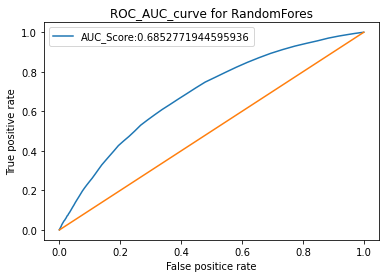

In [328]:
# Lets check AUC score and plot ROC_AUC curve
y_pred_proba_rf=rf.predict_proba(X_test)[::,1]
fpr, tpr, thresh = roc_curve(y_test,y_pred_proba_rf)
AUC_rf=roc_auc_score(y_test,y_pred_proba_rf)
plt.plot(fpr,tpr, label="AUC_Score:"+str(AUC_rf))
plt.plot([0,1],[0,1])             # this for 45degree straight line
plt.xlabel("False positice rate")
plt.ylabel("True positive rate")
plt.title("ROC_AUC_curve for RandomFores")
plt.legend(loc=2)
plt.show()


In [332]:
# lets test the model performance for training data
y_pred_train_rf=rf.predict(X_train)
print(classification_report(y_train,y_pred_train_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197845
           1       1.00      1.00      1.00    197845

    accuracy                           1.00    395690
   macro avg       1.00      1.00      1.00    395690
weighted avg       1.00      1.00      1.00    395690



##### model getting overfitted but not performing well with test data

##### lets do Hyper parameter tuning

## Model not getting computed even with very less parameters so not doing hyper parameter tuning

In [333]:
# lets create a dictionary with parameters
parameters= { "n_estimators": [50,100],
              "max_depth": [10,20,30],
              "min_samples_leaf": [2,3,4],
              "bootstrap" : [True, False]}

In [237]:
# lets import the RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=11), scoring = 'f1',
                               param_distributions=parameters,n_iter = 100, cv = 3,verbose=1, random_state = 16, n_jobs=-1)

# lets fit the Random_cv with training data
random_cv.fit(X_train,y_train)
print(random_cv.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


KeyboardInterrupt: 

In [ ]:
# lets train model with new parameters
rf_clf = RandomForestClassifier(random_state=42)

# fitting the data to model
rf_clf.fit(X_train,y_train)

In [ ]:
# lets predict and evoluate the model
y_pred_rf_tun=rf_clf.predict(X_test)
print(classification_report(y_test,y_pred_rf_tun))

In [ ]:
# Lets check AUC score and plot ROC_AUC curve
y_pred_proba_rf_tun=rf_clf.predict_proba(X_test)[::,1]
fpr, tpr, thresh = roc_curve(y_test,y_pred_proba_rf_tun)
AUC_rf_tun=roc_auc_score(y_test,y_pred_proba_rf_tun)
plt.plot(fpr,tpr, label="AUC_Score:"+str(AUC_rf_tun))
plt.plot([0,1],[0,1])             # this for 45degree straight line
plt.xlabel("False positice rate")
plt.ylabel("True positive rate")
plt.title("ROC_AUC_curve for RandomForest")
plt.legend(loc=2)
plt.show()


# NaiveBayes 

##### model performing some what better with MultinomialNB compared with Gaussina and BernoulliNB

In [334]:
# lets import the model and fit the model
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()

# fitting model
nb.fit(X_train,y_train)

MultinomialNB()

In [335]:
# lets predict the target
y_pred_nb=nb.predict(X_test)

# evaluting the model
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.51      0.66     84841
           1       0.10      0.60      0.17      7413

    accuracy                           0.52     92254
   macro avg       0.52      0.56      0.41     92254
weighted avg       0.87      0.52      0.62     92254



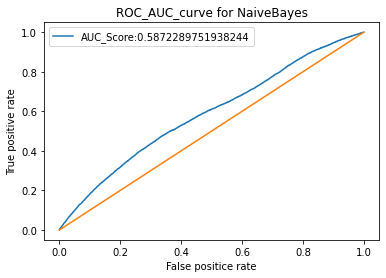

In [336]:
# Lets check AUC score and plot ROC_AUC curve
y_pred_proba_nb=nb.predict_proba(X_test)[::,1]
fpr, tpr, thresh = roc_curve(y_test,y_pred_proba_nb)
AUC_nb=roc_auc_score(y_test,y_pred_proba_nb)
plt.plot(fpr,tpr, label="AUC_Score:"+str(AUC_nb))
plt.plot([0,1],[0,1])             # this for 45degree straight line
plt.xlabel("False positice rate")
plt.ylabel("True positive rate")
plt.title("ROC_AUC_curve for NaiveBayes")
plt.legend(loc=2)
plt.show()


In [337]:
# lets test the model performance for training data
y_pred_train_nb=rf.predict(X_train)
print(classification_report(y_train,y_pred_train_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197845
           1       1.00      1.00      1.00    197845

    accuracy                           1.00    395690
   macro avg       1.00      1.00      1.00    395690
weighted avg       1.00      1.00      1.00    395690



##### model performing better for Recall-1 but overall performance is not better even AUC score is poor with NaiveBayes model


# AdaBoost Classifier

In [338]:
# lets import the model
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()

# lets fit the model
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [339]:
# predict and evaluting the model

y_pred_abc=abc.predict(X_test)

# evalution

print(classification_report(y_test,y_pred_abc))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89     84841
           1       0.14      0.27      0.18      7413

    accuracy                           0.81     92254
   macro avg       0.54      0.56      0.54     92254
weighted avg       0.87      0.81      0.83     92254



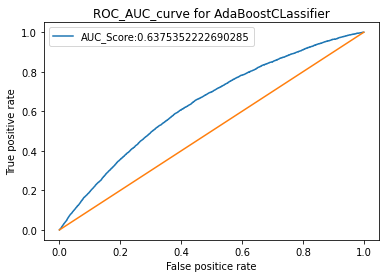

In [340]:
# Lets check AUC score and plot ROC_AUC curve
y_pred_proba_ada=abc.predict_proba(X_test)[::,1]
fpr, tpr, thresh = roc_curve(y_test,y_pred_proba_ada)
AUC_abc=roc_auc_score(y_test,y_pred_proba_ada)
plt.plot(fpr,tpr, label="AUC_Score:"+str(AUC_abc))
plt.plot([0,1],[0,1])             # this for 45degree straight line
plt.xlabel("False positice rate")
plt.ylabel("True positive rate")
plt.title("ROC_AUC_curve for AdaBoostCLassifier")
plt.legend(loc=2)
plt.show()


In [341]:
# checking training of the model

y_pred_train_abc = abc.predict(X_train)
print(classification_report(y_train,y_pred_train_abc))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85    197845
           1       0.85      0.85      0.85    197845

    accuracy                           0.85    395690
   macro avg       0.85      0.85      0.85    395690
weighted avg       0.85      0.85      0.85    395690



##### model not performing better than Logistic regression model

## Gradient boosting classifier

In [342]:
# lets import the model from scikit learn, train and test the model
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

# fitting the model
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [343]:
# predict and evaluting the model

y_pred_gb=gb.predict(X_test)

# evalution

print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     84841
           1       0.18      0.17      0.17      7413

    accuracy                           0.87     92254
   macro avg       0.55      0.55      0.55     92254
weighted avg       0.87      0.87      0.87     92254



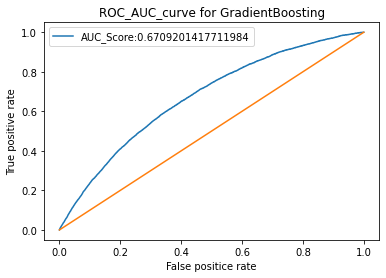

In [344]:
# Lets check AUC score and plot ROC_AUC curve
y_pred_proba_gb=gb.predict_proba(X_test)[::,1]
fpr, tpr, thresh = roc_curve(y_test,y_pred_proba_gb)
AUC_gb=roc_auc_score(y_test,y_pred_proba_gb)
plt.plot(fpr,tpr, label="AUC_Score:"+str(AUC_gb))
plt.plot([0,1],[0,1])             # this for 45degree straight line
plt.xlabel("False positice rate")
plt.ylabel("True positive rate")
plt.title("ROC_AUC_curve for GradientBoosting")
plt.legend(loc=2)
plt.show()


In [345]:
# checking training of the model

y_pred_train_gb = gb.predict(X_train)
print(classification_report(y_train,y_pred_train_gb))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91    197845
           1       0.93      0.88      0.90    197845

    accuracy                           0.90    395690
   macro avg       0.91      0.90      0.90    395690
weighted avg       0.91      0.90      0.90    395690



#### model perfoming good with training data but not well with test data

# XGBoost Classifier

In [346]:
# lets import and train the model
import xgboost
# model creation
from xgboost import XGBClassifier
xgb=XGBClassifier()

# fit the model
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [347]:
# predict and evaluting the model

y_pred_xgb=xgb.predict(X_test)

# evalution

print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     84841
           1       0.31      0.04      0.08      7413

    accuracy                           0.92     92254
   macro avg       0.61      0.52      0.52     92254
weighted avg       0.87      0.92      0.88     92254



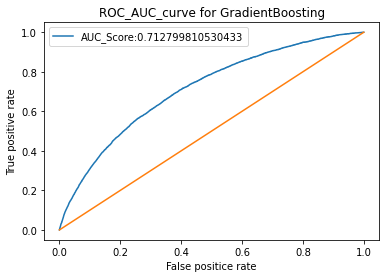

In [348]:
# Lets check AUC score and plot ROC_AUC curve
y_pred_proba_xgb=xgb.predict_proba(X_test)[::,1]
fpr, tpr, thresh = roc_curve(y_test,y_pred_proba_xgb)
AUC_xgb=roc_auc_score(y_test,y_pred_proba_xgb)
plt.plot(fpr,tpr, label="AUC_Score:"+str(AUC_xgb))
plt.plot([0,1],[0,1])             # this for 45degree straight line
plt.xlabel("False positice rate")
plt.ylabel("True positive rate")
plt.title("ROC_AUC_curve for GradientBoosting")
plt.legend(loc=2)
plt.show()


In [349]:
# predict and evaluting the model

y_pred_xgb_train=xgb.predict(X_train)

# evalution

print(classification_report(y_train,y_pred_xgb_train))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96    197845
           1       0.99      0.92      0.95    197845

    accuracy                           0.96    395690
   macro avg       0.96      0.96      0.96    395690
weighted avg       0.96      0.96      0.96    395690



##### model performance is not at all good for Recalling 1

# LightGB Classifier

In [352]:
# lets install the lgbm
!pip install lightgbm

In [353]:
# lets import and train the model

from lightgbm import LGBMClassifier
lgb=LGBMClassifier()

# fit the model
lgb.fit(X_train,y_train)

LGBMClassifier()

In [354]:
# predict and evaluting the model

y_pred_lgb=lgb.predict(X_test)

# evalution

print(classification_report(y_test,y_pred_lgb))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     84841
           1       0.27      0.03      0.06      7413

    accuracy                           0.91     92254
   macro avg       0.60      0.51      0.51     92254
weighted avg       0.87      0.91      0.88     92254



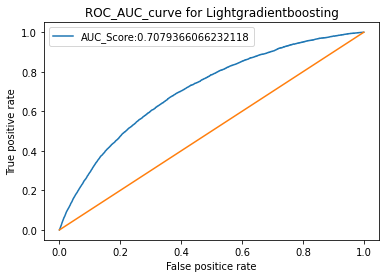

In [355]:
# Lets check AUC score and plot ROC_AUC curve

y_pred_proba_lgb=lgb.predict_proba(X_test)[::,1]
fpr, tpr, thresh = roc_curve(y_test,y_pred_proba_lgb)
AUC_lgb=roc_auc_score(y_test,y_pred_proba_lgb)
plt.plot(fpr,tpr, label="AUC_Score:"+str(AUC_lgb))
plt.plot([0,1],[0,1])             # this for 45degree straight line
plt.xlabel("False positice rate")
plt.ylabel("True positive rate")
plt.title("ROC_AUC_curve for Lightgradientboosting")
plt.legend(loc=2)
plt.show()

##### ROC_AUC score is good but recall for 1 is too low

# Comparison Report:

In [364]:
# lets create a Data frame for comparing the performance of the all models

LRCV=pd.DataFrame(classification_report(y_test,y_pred_cv,output_dict=True)).astype('float').round(2).iloc[:3,1]
KNN=pd.DataFrame(classification_report(y_test,y_pred_knn,output_dict=True)).astype('float').round(2).iloc[:3,1]
DT=pd.DataFrame(classification_report(y_test,y_pred_dt,output_dict=True)).astype('float').round(2).iloc[:3,1]
RF=pd.DataFrame(classification_report(y_test,y_pred_rf,output_dict=True)).astype('float').round(2).iloc[:3,1]
NB=pd.DataFrame(classification_report(y_test,y_pred_nb,output_dict=True)).astype('float').round(2).iloc[:3,1]
AB=pd.DataFrame(classification_report(y_test,y_pred_abc,output_dict=True)).astype('float').round(2).iloc[:3,1]
GB=pd.DataFrame(classification_report(y_test,y_pred_gb,output_dict=True)).astype('float').round(2).iloc[:3,1]
XGB=pd.DataFrame(classification_report(y_test,y_pred_xgb,output_dict=True)).astype('float').round(2).iloc[:3,1]
LGB=pd.DataFrame(classification_report(y_test,y_pred_lgb,output_dict=True)).astype('float').round(2).iloc[:3,1]

# creating columns of for the comparison report
model={'LinearRegressioncv':LRCV,'KNN':KNN,'Decision_tree':DT,'Random_forest':RF,'NaiveBayes':NB,'Ada_boost':AB,
       'gradient_boosting':GB,'XGB_classifer':XGB,'lightGB':LGB}
index=['precision','recall','f1-score']

# lets create a dataframe out of all comparison parameters
comparison=pd.DataFrame(data=model,index=index).round(2)

In [379]:
# adding AUC_score to the dataframe
comparison.loc[3]=[AUC_lrcv,AUC_knn,AUC_dt,AUC_rf,AUC_nb,AUC_abc,AUC_gb,AUC_xgb,AUC_lgb]
comparison.rename(index={3:'AUC_Score'}, inplace=True)

In [380]:
comparison.round(2)

LinearRegressioncv   KNN  Decision_tree  Random_forest  NaiveBayes  \
precision                0.15  0.10           0.12           0.19        0.10   
recall                   0.57  0.41           0.24           0.07        0.60   
f1-score                 0.23  0.16           0.16           0.11        0.17   
AUC_Score                0.69  0.54           0.54           0.69        0.59   

           Ada_boost  gradient_boosting  XGB_classifer  lightGB  
precision       0.14               0.18           0.31     0.27  
recall          0.27               0.17           0.04     0.03  
f1-score        0.18               0.17           0.08     0.06  
AUC_Score       0.64               0.67           0.71     0.71

### Summary:

#### XGB and LightGB models performing good with better ROC_AUC score comapred to other models, if we consider the Recall for 1 it's Logistic regression and Naive bayes are better